# Introduction

The purpose of this document is to give a tangible example to the theory behind regression. In this exploration, we will perform linear regression and polynomial regression on AAPL stock market data (stock prices for Apple) using Python. You should download up to a year of data through the Yahoo Finance website. Additionally, it is highly recommended that you review the presented class slides in order to make sense of the presented regression techniques. This document will describe the steps needed to make a regression program as well as the code for it.


# Instructions
## Importing Libraries
Start off by importing the libraries: pandas, numpy, and matplotlib.pyplot. We will be using these three libraries throughout our program.

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Data
We will first load the data to our program using pandas. I use the name "AAPL.csv", but your data set may be named differently. Adjust your own code appropriately.

In [4]:
# read dataset
df = pd.read_csv('AAPL.csv')

## Defining Variables
Next, we define some variables. 

The variable “y” will be our set of y values, stored in a numpy array. The y values will be the column containing the Open price of the AAPL stock for each day. Define a variable “m” to be the length of the y values. This will be repeatedly helpful in the future.

In [5]:
# define data variables X, y, m, and alpha
y = df.iloc[1:50, 1].values.reshape(-1, 1).reshape(-1,1)
#    length of the dataset
m = len(y)

Now, define the learning rate “alpha” to be 1.95. This will determine how quickly our Θ values converge. We cannot set this to be too high, otherwise the Θ values will diverge, and it cannot be too small either, otherwise our algorithm will be very slow. If the algorithm ends up not working, try decreasing alpha just to be safe.

In [6]:
#    learning rate alpha
alpha = 1.95

Next, make a numpy array containing the values from 1 to “m” and store this in the variable “X”. These X values correspond to the day number. In short, we will be using our X values to predict our y values. (Tip: Try limiting the number of y values through the declaration statement of y for better results. Any number of training examples under 50 should work great.)

In [7]:
#    our x values are the day number
X = np.zeros((m,1))  # we start with an array of zeros
for i in range(m): # and we fill in the elements as 1,2,3, etc.
    X[i][0]=i+1

## Normalization
Before starting our algorithm, we must normalize the X and Y values, otherwise we will get an error and gradient descent will not converge.

In [8]:
# In order to perform gradient descent, we normalize the X and y values
meanX = np.mean(X)
rangeX = np.ptp(X)
meany = np.mean(y)
rangey = np.ptp(y)
Xnorm = (X-meanX)/rangeX
ynorm = (y-meany)/rangey

## Cost Function and Gradient
Now, you should define the cost function using the mean squared error technique and the gradient. Both of these should take the parameters: X values, y values, and theta.

Note that the new theta values should be: “theta” = “theta” - “alpha” * “gradient”. Also note that in order to compute the hypothesis, you must first append a vector of ones to the left of the normalized X values array to account for the bias unit, or the y intercept. Try not to change the normalized vector, as doing so will complicate things. You are now ready to do linear regression.

In [9]:
# We define another function to compute the cost function, given theta values,
# X values, and y values.
def CostFunction(Xvals,yvals,thetavals):
    # Sidnote: Some of the processes here will involve matricies and vectors,
    # but you need not worry if you do not know about vectors or matricies yet.
    # Just make sure you follow the logic behind what we are doing.

    # We first append a vector of ones for our bias unit (aka for our y intercept)
    Xvals = np.hstack((np.ones((Xvals.shape[0],1)), Xvals))
    # Now we compute the hypothesis using matrix multiplication.
    hx = Xvals.dot(thetavals)
    # Now that we have our hypothesis, we can compute the cost function.
    # Remember, the cost function is the mean squared error.
    return (1/(2*m))*sum((hx-yvals)**2)

# Now, we compute the gradient of the theta values.
def Gradient(Xvals,yvals,thetavals):
    # Once again, we append the ones to our Xvals and compute the hypothesis.
    Xvals = np.hstack((np.ones((Xvals.shape[0],1)), Xvals))
    hx = Xvals.dot(thetavals)
    # We now compute the gradient of the theta values.
    return thetavals - alpha * (1/m)* (Xvals.T) @ (hx-yvals)

## Linear Regression
The goal of this part is to run linear regression on the imported data. Start by initializing an array of theta values. This array should be a vector/matrix of zeros with the dimensions (2,1), the first theta value being for the y intercept, and the second theta value corresponding to the slope of the desired line. 

In [10]:
# initialize theta values at zero
# Remember, we need two theta values. One must be the slope, and the other must be the y intercept.
theta = np.zeros((2,1))

Now, we integrate all of the above steps to perform linear regression. Use a for-loop to repeatedly evaluate the cost function for theta and then adjust the theta values according to the gradient. In this manner, your program will learn the optimal values for theta for linear regression. You should perform this for-loop for 1000 iterations.

In [11]:
# Now that we have our cost function and gradient, we can put it all together!
# We perform 1000 iterations to find the optimal theta values for linear regression.
for i in range(1000):
    # First, we print the theta values.
    print("Theta: ")
    print(theta)
    # We print the cost function as a general indicator of how our program is running.
    print("Cost Function: ")
    print(CostFunction(Xnorm,ynorm,theta))
    # Adjust theta values according to the gradient.
    theta = Gradient(Xnorm,ynorm,theta)

Theta: 
[[0.]
 [0.]]
Cost Function: 
[0.02220796]
Theta: 
[[1.25940924e-15]
 [7.16088044e-02]]
Cost Function: 
[0.01980087]
Theta: 
[[8.50014503e-17]
 [1.31096327e-01]]
Cost Function: 
[0.01813971]
Theta: 
[[1.16226473e-15]
 [1.80514347e-01]]
Cost Function: 
[0.01699333]
Theta: 
[[1.63064007e-16]
 [2.21567337e-01]]
Cost Function: 
[0.0162022]
Theta: 
[[1.10328413e-15]
 [2.55671254e-01]]
Cost Function: 
[0.01565623]
Theta: 
[[2.39391840e-16]
 [2.84002372e-01]]
Cost Function: 
[0.01527945]
Theta: 
[[1.06338549e-15]
 [3.07537858e-01]]
Cost Function: 
[0.01501943]
Theta: 
[[2.55871713e-16]
 [3.27089473e-01]]
Cost Function: 
[0.01483999]
Theta: 
[[1.01915004e-15]
 [3.43331570e-01]]
Cost Function: 
[0.01471615]
Theta: 
[[2.97505076e-16]
 [3.56824353e-01]]
Cost Function: 
[0.01463069]
Theta: 
[[9.88792381e-16]
 [3.68033202e-01]]
Cost Function: 
[0.01457171]
Theta: 
[[3.22658567e-16]
 [3.77344720e-01]]
Cost Function: 
[0.01453101]
Theta: 
[[9.59302082e-16]
 [3.85080069e-01]]
Cost Function: 
[0

[0.01444037]
Theta: 
[[6.68735900e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.14959472e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.90419943e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.19296281e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.86083135e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.94142791e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.06899816e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.08020578e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.82613688e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.11490025e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.92154667e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.13224749e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.81746326e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[6.12357387e-16]

[0.01444037]
Theta: 
[[5.66387215e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.60676244e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.53376789e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.54604712e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.61183044e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.62410968e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.55111512e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.56339436e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.62917768e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.57206797e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.63785130e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58074159e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.64652491e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58941521e-16]

[0.01444037]
Theta: 
[[7.59808882e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.66387215e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.60676244e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.53376789e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.54604712e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.61183044e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.62410968e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.55111512e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.56339436e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.62917768e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.57206797e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.63785130e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58074159e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.64652491e-16]

 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.65519853e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.59808882e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.66387215e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.60676244e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.53376789e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.54604712e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.61183044e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.62410968e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.55111512e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.56339436e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.62917768e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.57206797e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.63785130e-16]
 [4.23042783e-01]]
Cost Function: 
[0.

 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.66387215e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.60676244e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.53376789e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.54604712e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.61183044e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.62410968e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.55111512e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.56339436e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.62917768e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.57206797e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.63785130e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58074159e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.64652491e-16]
 [4.23042783e-01]]
Cost Function: 
[0.

Theta: 
[[7.54604712e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.61183044e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.62410968e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.55111512e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.56339436e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.62917768e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.57206797e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.63785130e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58074159e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.64652491e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58941521e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.65519853e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.59808882e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.66387215e-16]
 [4.23042783

[0.01444037]
Theta: 
[[7.60676244e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.53376789e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.54604712e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.61183044e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.62410968e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.55111512e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.56339436e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.62917768e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.57206797e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.63785130e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58074159e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.64652491e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[7.58941521e-16]
 [4.23042783e-01]]
Cost Function: 
[0.01444037]
Theta: 
[[5.65519853e-16]

You should now use the learned values for theta along with the normalized X values to predict the normalized y values.

In [12]:
# We now plot our results.
# Compute the hypothesis using the normalized X values.
hx = np.hstack((np.ones((Xnorm.shape[0],1)), Xnorm)).dot(theta)

### Denormalization
After this, you must de-normalize your normalized y values to get your final predictions.

In [13]:
# Now, we de-normalize the predictions to get our predictions.
hx = (hx*rangey)+meany

### Plotting Linear Regression
Use the matplotlib.pyplot library to plot both the original data as well as your predictions in a single plot. This will show you how close you were to the actual values of y. You can also see the values of the cost function to find how quantitatively accurate your predictions are.

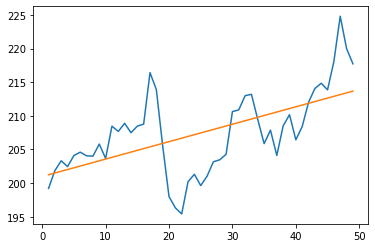

In [14]:
# Plot the original data points.
plt.plot(X,y)
# Plot the hypothesis.
plt.plot(X,hx)
# Show the plot.
plt.show()

## Polynomial Regression
In this part, we implement polynomial regression to get a more sophisticated hypothesis. This time, we start by adjusting the normalized X values to also include x^2, x^3, x^4, and x^5 terms. We do this by raising the normalized X values to the powers 1,2,3,4, and 5 and putting these all together into one array.

In [15]:
# Now that we have implemented linear regression, let us move onto polynomial regression.
# Specifically, we try to fit a quintic polynomial to the data.

# First, we define our X again to include the quadratic, cubic, quartic, and quintic terms.
Xnorm = Xnorm[:,0]
Xnorm = np.c_[Xnorm,Xnorm**2,Xnorm**3,Xnorm**4,Xnorm**5]

Now, we initialize the theta values of polynomial regression to be a vector/matrix of zeros with the dimensions (6,1). We include these six terms for the: 1) bias unit, 2) x terms, 3) x^2 terms, 4) x^3 terms, 5) x^4 terms, 6) x^5 terms in our hypothesis.

In [16]:
# We must also define theta again. We use a 6 dimensional vector for the:
# 1) Constant Term; 2) x term; 3) x^2 term; 4) x^3 term; 5) x^4 term; 6) x^5 term.
theta = np.zeros((6,1))

Again, we make a for-loop to compute both the cost function and adjust the theta values according to the gradient. You should run this for-loop at least 10,000 times.

In [17]:
# Now, we just run gradient descent like before. This time, we do 10000 iterations
# to fit polynomial regression nicely.
for i in range(10000):
    # First, we print the theta values.
    print("Theta: ")
    print(theta)
    # We print the cost function as a general indicator of how our program is running.
    print("Cost Function: ")
    print(CostFunction(Xnorm,ynorm,theta))
    # Adjust theta values according to the gradient.
    theta = Gradient(Xnorm,ynorm,theta)

Theta: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Cost Function: 
[0.02220796]
Theta: 
[[1.25940924e-15]
 [7.16088044e-02]
 [1.09204420e-02]
 [1.36483508e-02]
 [2.10793000e-03]
 [2.81909506e-03]]
Cost Function: 
[0.01965271]
Theta: 
[[-0.00190423]
 [ 0.1307217 ]
 [ 0.02154186]
 [ 0.02533397]
 [ 0.00416013]
 [ 0.00527233]]
Cost Function: 
[0.01788816]
Theta: 
[[-0.00194736]
 [ 0.17950756]
 [ 0.03219477]
 [ 0.03539717]
 [ 0.00620846]
 [ 0.0074231 ]]
Cost Function: 
[0.01666411]
Theta: 
[[-0.00376376]
 [ 0.21975883]
 [ 0.04256331]
 [ 0.04411922]
 [ 0.00820357]
 [ 0.00932382]]
Cost Function: 
[0.01580965]
Theta: 
[[-0.00384601]
 [ 0.25295684]
 [ 0.05295544]
 [ 0.05173254]
 [ 0.0101938 ]
 [ 0.01101777]]
Cost Function: 
[0.01520805]
Theta: 
[[-0.00557957]
 [ 0.28032582]
 [ 0.06307702]
 [ 0.05842923]
 [ 0.01213317]
 [ 0.01254075]]
Cost Function: 
[0.01477956]
Theta: 
[[-0.00569724]
 [ 0.30287754]
 [ 0.07321496]
 [ 0.06436805]
 [ 0.01406674]
 [ 0.01392233]]
Cost Function: 
[0.01446972]
Theta: 
[[-0

[0.01174741]
Theta: 
[[-0.05485174]
 [ 0.37884524]
 [ 0.61689482]
 [ 0.28211366]
 [ 0.10617829]
 [ 0.07817292]]
Cost Function: 
[0.01173861]
Theta: 
[[-0.05511985]
 [ 0.37848529]
 [ 0.62027164]
 [ 0.28428441]
 [ 0.1066008 ]
 [ 0.0788346 ]]
Cost Function: 
[0.01172996]
Theta: 
[[-0.05544791]
 [ 0.37812564]
 [ 0.62360251]
 [ 0.28645336]
 [ 0.1070134 ]
 [ 0.07949576]]
Cost Function: 
[0.01172147]
Theta: 
[[-0.05571098]
 [ 0.37776628]
 [ 0.62689883]
 [ 0.2886205 ]
 [ 0.10741789]
 [ 0.0801564 ]]
Cost Function: 
[0.01171311]
Theta: 
[[-0.05602973]
 [ 0.37740722]
 [ 0.63015056]
 [ 0.29078584]
 [ 0.10781275]
 [ 0.0808165 ]]
Cost Function: 
[0.0117049]
Theta: 
[[-0.05628778]
 [ 0.37704846]
 [ 0.63336835]
 [ 0.29294938]
 [ 0.10819967]
 [ 0.08147608]]
Cost Function: 
[0.01169682]
Theta: 
[[-0.05659753]
 [ 0.37669   ]
 [ 0.63654287]
 [ 0.29511113]
 [ 0.10857722]
 [ 0.08213513]]
Cost Function: 
[0.01168888]
Theta: 
[[-0.0568506 ]
 [ 0.37633183]
 [ 0.63968405]
 [ 0.29727107]
 [ 0.10894699]
 [ 0.0827

Theta: 
[[-0.07016101]
 [ 0.35130926]
 [ 0.79040837]
 [ 0.44816121]
 [ 0.11869822]
 [ 0.12885442]]
Cost Function: 
[0.01132633]
Theta: 
[[-0.07027778]
 [ 0.35097214]
 [ 0.79172847]
 [ 0.45019396]
 [ 0.11866076]
 [ 0.12947574]]
Cost Function: 
[0.01132306]
Theta: 
[[-0.07038931]
 [ 0.3506353 ]
 [ 0.79303364]
 [ 0.45222501]
 [ 0.11861994]
 [ 0.13009656]]
Cost Function: 
[0.01131981]
Theta: 
[[-0.0705032 ]
 [ 0.35029874]
 [ 0.79432338]
 [ 0.45425438]
 [ 0.1185757 ]
 [ 0.13071689]]
Cost Function: 
[0.01131659]
Theta: 
[[-0.07061215]
 [ 0.34996246]
 [ 0.79559852]
 [ 0.45628206]
 [ 0.11852817]
 [ 0.13133673]]
Cost Function: 
[0.01131339]
Theta: 
[[-0.07072324]
 [ 0.34962646]
 [ 0.79685863]
 [ 0.45830806]
 [ 0.11847731]
 [ 0.13195607]]
Cost Function: 
[0.01131022]
Theta: 
[[-0.07082966]
 [ 0.34929073]
 [ 0.79810448]
 [ 0.46033237]
 [ 0.11842325]
 [ 0.13257492]]
Cost Function: 
[0.01130706]
Theta: 
[[-0.07093802]
 [ 0.34895529]
 [ 0.79933569]
 [ 0.462355  ]
 [ 0.11836594]
 [ 0.13319328]]
Cost 

 [ 0.19261215]]
Cost Function: 
[0.01105541]
Theta: 
[[-0.07715258]
 [ 0.3164694 ]
 [ 0.87316249]
 [ 0.65821465]
 [ 0.10132409]
 [ 0.19318284]]
Cost Function: 
[0.01105331]
Theta: 
[[-0.07718438]
 [ 0.31616118]
 [ 0.87356389]
 [ 0.66007277]
 [ 0.10108224]
 [ 0.19375307]]
Cost Function: 
[0.01105121]
Theta: 
[[-0.07721572]
 [ 0.31585321]
 [ 0.87396124]
 [ 0.66192935]
 [ 0.10083951]
 [ 0.19432286]]
Cost Function: 
[0.01104912]
Theta: 
[[-0.07724679]
 [ 0.31554549]
 [ 0.8743546 ]
 [ 0.66378438]
 [ 0.10059589]
 [ 0.19489219]]
Cost Function: 
[0.01104703]
Theta: 
[[-0.07727742]
 [ 0.31523803]
 [ 0.87474401]
 [ 0.66563787]
 [ 0.10035141]
 [ 0.19546108]]
Cost Function: 
[0.01104495]
Theta: 
[[-0.07730777]
 [ 0.31493083]
 [ 0.87512951]
 [ 0.66748982]
 [ 0.10010606]
 [ 0.19602951]]
Cost Function: 
[0.01104287]
Theta: 
[[-0.07733771]
 [ 0.31462388]
 [ 0.87551116]
 [ 0.66934023]
 [ 0.09985987]
 [ 0.19659749]]
Cost Function: 
[0.01104079]
Theta: 
[[-0.07736737]
 [ 0.31431718]
 [ 0.875889  ]
 [ 0.6

 [ 0.24802877]]
Cost Function: 
[0.01086264]
Theta: 
[[-0.07907869]
 [ 0.28659492]
 [ 0.89952381]
 [ 0.83829167]
 [ 0.07379836]
 [ 0.24855561]]
Cost Function: 
[0.0108609]
Theta: 
[[-0.07908916]
 [ 0.28631148]
 [ 0.89968961]
 [ 0.84000004]
 [ 0.07350529]
 [ 0.24908204]]
Cost Function: 
[0.01085916]
Theta: 
[[-0.07909953]
 [ 0.28602826]
 [ 0.89985423]
 [ 0.84170699]
 [ 0.07321198]
 [ 0.24960806]]
Cost Function: 
[0.01085743]
Theta: 
[[-0.0791098 ]
 [ 0.28574529]
 [ 0.9000177 ]
 [ 0.84341251]
 [ 0.07291843]
 [ 0.25013366]]
Cost Function: 
[0.0108557]
Theta: 
[[-0.07911996]
 [ 0.28546254]
 [ 0.90018002]
 [ 0.84511662]
 [ 0.07262463]
 [ 0.25065884]]
Cost Function: 
[0.01085397]
Theta: 
[[-0.07913001]
 [ 0.28518003]
 [ 0.90034122]
 [ 0.84681931]
 [ 0.0723306 ]
 [ 0.25118361]]
Cost Function: 
[0.01085224]
Theta: 
[[-0.07913997]
 [ 0.28489776]
 [ 0.90050131]
 [ 0.84852059]
 [ 0.07203633]
 [ 0.25170797]]
Cost Function: 
[0.01085052]
Theta: 
[[-0.07914983]
 [ 0.28461572]
 [ 0.90066029]
 [ 0.850

[0.01075528]
Theta: 
[[-0.07958691]
 [ 0.26865144]
 [ 0.90838703]
 [ 0.94643072]
 [ 0.05435337]
 [ 0.28192386]]
Cost Function: 
[0.01075372]
Theta: 
[[-0.07959263]
 [ 0.26838288]
 [ 0.90850007]
 [ 0.94804913]
 [ 0.05404952]
 [ 0.28242397]]
Cost Function: 
[0.01075216]
Theta: 
[[-0.0795983 ]
 [ 0.26811454]
 [ 0.90861258]
 [ 0.9496662 ]
 [ 0.05374556]
 [ 0.2829237 ]]
Cost Function: 
[0.0107506]
Theta: 
[[-0.07960393]
 [ 0.26784642]
 [ 0.90872457]
 [ 0.95128192]
 [ 0.05344151]
 [ 0.28342302]]
Cost Function: 
[0.01074904]
Theta: 
[[-0.0796095 ]
 [ 0.26757852]
 [ 0.90883604]
 [ 0.95289629]
 [ 0.05313735]
 [ 0.28392196]]
Cost Function: 
[0.01074749]
Theta: 
[[-0.07961503]
 [ 0.26731085]
 [ 0.908947  ]
 [ 0.95450933]
 [ 0.0528331 ]
 [ 0.2844205 ]]
Cost Function: 
[0.01074594]
Theta: 
[[-0.07962052]
 [ 0.2670434 ]
 [ 0.90905747]
 [ 0.95612102]
 [ 0.05252875]
 [ 0.28491865]]
Cost Function: 
[0.01074439]
Theta: 
[[-0.07962596]
 [ 0.26677617]
 [ 0.90916743]
 [ 0.95773137]
 [ 0.0522243 ]
 [ 0.2854

Theta: 
[[-0.07991238]
 [ 0.24936767]
 [ 0.91566524]
 [ 1.06262773]
 [ 0.03166805]
 [ 0.31788943]]
Cost Function: 
[0.01064469]
Theta: 
[[-0.07991577]
 [ 0.2491151 ]
 [ 0.9157524 ]
 [ 1.06414946]
 [ 0.03135958]
 [ 0.31836127]]
Cost Function: 
[0.0106433]
Theta: 
[[-0.07991914]
 [ 0.24886274]
 [ 0.91583934]
 [ 1.06566993]
 [ 0.03105109]
 [ 0.31883273]]
Cost Function: 
[0.01064192]
Theta: 
[[-0.0799225 ]
 [ 0.24861059]
 [ 0.91592607]
 [ 1.06718912]
 [ 0.03074256]
 [ 0.31930382]]
Cost Function: 
[0.01064053]
Theta: 
[[-0.07992584]
 [ 0.24835865]
 [ 0.91601259]
 [ 1.06870706]
 [ 0.03043399]
 [ 0.31977454]]
Cost Function: 
[0.01063915]
Theta: 
[[-0.07992916]
 [ 0.24810693]
 [ 0.91609891]
 [ 1.07022373]
 [ 0.0301254 ]
 [ 0.3202449 ]]
Cost Function: 
[0.01063778]
Theta: 
[[-0.07993246]
 [ 0.2478554 ]
 [ 0.91618502]
 [ 1.07173914]
 [ 0.02981678]
 [ 0.32071488]]
Cost Function: 
[0.0106364]
Theta: 
[[-0.07993574]
 [ 0.24760409]
 [ 0.91627093]
 [ 1.07325328]
 [ 0.02950813]
 [ 0.3211845 ]]
Cost Fu

[0.01049659]
Theta: 
[[-0.08022591]
 [ 0.22096595]
 [ 0.92497126]
 [ 1.23372364]
 [-0.00483971]
 [ 0.37108851]]
Cost Function: 
[0.01049543]
Theta: 
[[-0.0802281 ]
 [ 0.22073695]
 [ 0.9250448 ]
 [ 1.23510296]
 [-0.00514933]
 [ 0.37151868]]
Cost Function: 
[0.01049429]
Theta: 
[[-0.08023029]
 [ 0.22050814]
 [ 0.9251183 ]
 [ 1.23648112]
 [-0.00545896]
 [ 0.37194852]]
Cost Function: 
[0.01049314]
Theta: 
[[-0.08023247]
 [ 0.22027951]
 [ 0.92519174]
 [ 1.23785814]
 [-0.00576858]
 [ 0.37237802]]
Cost Function: 
[0.01049199]
Theta: 
[[-0.08023464]
 [ 0.22005108]
 [ 0.92526513]
 [ 1.23923402]
 [-0.00607819]
 [ 0.37280718]]
Cost Function: 
[0.01049085]
Theta: 
[[-0.08023682]
 [ 0.21982284]
 [ 0.92533847]
 [ 1.24060874]
 [-0.0063878 ]
 [ 0.37323601]]
Cost Function: 
[0.01048971]
Theta: 
[[-0.08023898]
 [ 0.21959478]
 [ 0.92541175]
 [ 1.24198232]
 [-0.00669741]
 [ 0.37366451]]
Cost Function: 
[0.01048857]
Theta: 
[[-0.08024115]
 [ 0.21936692]
 [ 0.92548499]
 [ 1.24335476]
 [-0.00700701]
 [ 0.374

 [ 0.4076876 ]]
Cost Function: 
[0.01040098]
Theta: 
[[-0.08040779]
 [ 0.20131125]
 [ 0.93136395]
 [ 1.35209172]
 [-0.03236831]
 [ 0.40808925]]
Cost Function: 
[0.01039998]
Theta: 
[[-0.08040973]
 [ 0.20109856]
 [ 0.9314345 ]
 [ 1.35337247]
 [-0.03267718]
 [ 0.40849059]]
Cost Function: 
[0.01039898]
Theta: 
[[-0.08041167]
 [ 0.20088604]
 [ 0.93150504]
 [ 1.35465215]
 [-0.03298605]
 [ 0.40889161]]
Cost Function: 
[0.01039799]
Theta: 
[[-0.0804136 ]
 [ 0.2006737 ]
 [ 0.93157556]
 [ 1.35593076]
 [-0.0332949 ]
 [ 0.40929232]]
Cost Function: 
[0.01039699]
Theta: 
[[-0.08041554]
 [ 0.20046154]
 [ 0.93164606]
 [ 1.35720831]
 [-0.03360375]
 [ 0.40969272]]
Cost Function: 
[0.010396]
Theta: 
[[-0.08041747]
 [ 0.20024955]
 [ 0.93171654]
 [ 1.35848479]
 [-0.03391258]
 [ 0.41009281]]
Cost Function: 
[0.01039501]
Theta: 
[[-0.0804194 ]
 [ 0.20003774]
 [ 0.931787  ]
 [ 1.35976021]
 [-0.0342214 ]
 [ 0.41049259]]
Cost Function: 
[0.01039402]
Theta: 
[[-0.08042133]
 [ 0.1998261 ]
 [ 0.93185744]
 [ 1.361

 [ 0.44746151]]
Cost Function: 
[0.01030585]
Theta: 
[[-0.08060159]
 [ 0.18030569]
 [ 0.9385538 ]
 [ 1.47855806]
 [-0.06411655]
 [ 0.44783231]]
Cost Function: 
[0.010305]
Theta: 
[[-0.08060343]
 [ 0.18011043]
 [ 0.93862304]
 [ 1.47973344]
 [-0.06442409]
 [ 0.44820283]]
Cost Function: 
[0.01030415]
Theta: 
[[-0.08060527]
 [ 0.17991533]
 [ 0.93869227]
 [ 1.48090785]
 [-0.06473161]
 [ 0.44857305]]
Cost Function: 
[0.0103033]
Theta: 
[[-0.08060711]
 [ 0.1797204 ]
 [ 0.93876149]
 [ 1.48208128]
 [-0.06503912]
 [ 0.44894299]]
Cost Function: 
[0.01030245]
Theta: 
[[-0.08060895]
 [ 0.17952562]
 [ 0.9388307 ]
 [ 1.48325373]
 [-0.06534662]
 [ 0.44931265]]
Cost Function: 
[0.01030161]
Theta: 
[[-0.08061079]
 [ 0.17933101]
 [ 0.93889991]
 [ 1.4844252 ]
 [-0.0656541 ]
 [ 0.44968202]]
Cost Function: 
[0.01030077]
Theta: 
[[-0.08061263]
 [ 0.17913656]
 [ 0.93896911]
 [ 1.4855957 ]
 [-0.06596157]
 [ 0.4500511 ]]
Cost Function: 
[0.01029992]
Theta: 
[[-0.08061447]
 [ 0.17894227]
 [ 0.9390383 ]
 [ 1.4867

[0.01024184]
Theta: 
[[-0.08074765]
 [ 0.16518613]
 [ 0.94407129]
 [ 1.56955949]
 [-0.08867434]
 [ 0.47658706]]
Cost Function: 
[0.01024109]
Theta: 
[[-0.08074946]
 [ 0.16500342]
 [ 0.94414002]
 [ 1.57065903]
 [-0.08898073]
 [ 0.47693538]]
Cost Function: 
[0.01024034]
Theta: 
[[-0.08075127]
 [ 0.16482086]
 [ 0.94420874]
 [ 1.57175765]
 [-0.0892871 ]
 [ 0.47728344]]
Cost Function: 
[0.01023959]
Theta: 
[[-0.08075309]
 [ 0.16463846]
 [ 0.94427746]
 [ 1.57285536]
 [-0.08959346]
 [ 0.47763123]]
Cost Function: 
[0.01023884]
Theta: 
[[-0.0807549 ]
 [ 0.1644562 ]
 [ 0.94434618]
 [ 1.57395215]
 [-0.0898998 ]
 [ 0.47797875]]
Cost Function: 
[0.0102381]
Theta: 
[[-0.08075671]
 [ 0.1642741 ]
 [ 0.94441489]
 [ 1.57504802]
 [-0.09020613]
 [ 0.478326  ]]
Cost Function: 
[0.01023735]
Theta: 
[[-0.08075852]
 [ 0.16409214]
 [ 0.9444836 ]
 [ 1.57614299]
 [-0.09051244]
 [ 0.47867298]]
Cost Function: 
[0.01023661]
Theta: 
[[-0.08076033]
 [ 0.16391034]
 [ 0.9445523 ]
 [ 1.57723704]
 [-0.09081874]
 [ 0.4790

Theta: 
[[-0.08103725]
 [ 0.13764022]
 [ 0.9550809 ]
 [ 1.7352807 ]
 [-0.13781223]
 [ 0.52935982]]
Cost Function: 
[0.01013414]
Theta: 
[[-0.08103904]
 [ 0.13748038]
 [ 0.95514897]
 [ 1.73624202]
 [-0.13811623]
 [ 0.5296677 ]]
Cost Function: 
[0.01013356]
Theta: 
[[-0.08104083]
 [ 0.13732067]
 [ 0.95521703]
 [ 1.73720254]
 [-0.13842022]
 [ 0.52997535]]
Cost Function: 
[0.01013297]
Theta: 
[[-0.08104261]
 [ 0.1371611 ]
 [ 0.95528509]
 [ 1.73816226]
 [-0.13872419]
 [ 0.53028277]]
Cost Function: 
[0.01013239]
Theta: 
[[-0.0810444 ]
 [ 0.13700165]
 [ 0.95535315]
 [ 1.73912118]
 [-0.13902815]
 [ 0.53058995]]
Cost Function: 
[0.01013181]
Theta: 
[[-0.08104619]
 [ 0.13684234]
 [ 0.95542121]
 [ 1.7400793 ]
 [-0.13933209]
 [ 0.5308969 ]]
Cost Function: 
[0.01013122]
Theta: 
[[-0.08104798]
 [ 0.13668316]
 [ 0.95548926]
 [ 1.74103662]
 [-0.13963602]
 [ 0.53120362]]
Cost Function: 
[0.01013064]
Theta: 
[[-0.08104976]
 [ 0.13652412]
 [ 0.95555731]
 [ 1.74199314]
 [-0.13993993]
 [ 0.5315101 ]]
Cost 

Cost Function: 
[0.0100793]
Theta: 
[[-0.08121908]
 [ 0.12200161]
 [ 0.96200592]
 [ 1.82931559]
 [-0.16874401]
 [ 0.55958803]]
Cost Function: 
[0.0100788]
Theta: 
[[-0.08122086]
 [ 0.12185475]
 [ 0.96207363]
 [ 1.83019843]
 [-0.1690465 ]
 [ 0.55987295]]
Cost Function: 
[0.0100783]
Theta: 
[[-0.08122264]
 [ 0.12170802]
 [ 0.96214135]
 [ 1.83108052]
 [-0.16934897]
 [ 0.56015766]]
Cost Function: 
[0.0100778]
Theta: 
[[-0.08122441]
 [ 0.12156141]
 [ 0.96220906]
 [ 1.83196188]
 [-0.16965143]
 [ 0.56044215]]
Cost Function: 
[0.0100773]
Theta: 
[[-0.08122619]
 [ 0.12141492]
 [ 0.96227676]
 [ 1.83284251]
 [-0.16995388]
 [ 0.56072643]]
Cost Function: 
[0.0100768]
Theta: 
[[-0.08122797]
 [ 0.12126856]
 [ 0.96234446]
 [ 1.8337224 ]
 [-0.17025631]
 [ 0.56101049]]
Cost Function: 
[0.0100763]
Theta: 
[[-0.08122975]
 [ 0.12112231]
 [ 0.96241216]
 [ 1.83460155]
 [-0.17055872]
 [ 0.56129433]]
Cost Function: 
[0.0100758]
Theta: 
[[-0.08123152]
 [ 0.12097619]
 [ 0.96247986]
 [ 1.83547997]
 [-0.17086112]


 [ 0.57848026]]
Cost Function: 
[0.01004636]
Theta: 
[[-0.08134152]
 [ 0.1121496 ]
 [ 0.96667038]
 [ 1.88853336]
 [-0.18958099]
 [ 0.57875091]]
Cost Function: 
[0.0100459]
Theta: 
[[-0.08134329]
 [ 0.11201093]
 [ 0.96673786]
 [ 1.88936674]
 [-0.18988246]
 [ 0.57902136]]
Cost Function: 
[0.01004545]
Theta: 
[[-0.08134506]
 [ 0.11187237]
 [ 0.96680534]
 [ 1.89019942]
 [-0.19018391]
 [ 0.57929161]]
Cost Function: 
[0.010045]
Theta: 
[[-0.08134684]
 [ 0.11173393]
 [ 0.96687282]
 [ 1.8910314 ]
 [-0.19048535]
 [ 0.57956166]]
Cost Function: 
[0.01004455]
Theta: 
[[-0.08134861]
 [ 0.11159561]
 [ 0.96694029]
 [ 1.89186269]
 [-0.19078677]
 [ 0.5798315 ]]
Cost Function: 
[0.0100441]
Theta: 
[[-0.08135038]
 [ 0.1114574 ]
 [ 0.96700776]
 [ 1.89269329]
 [-0.19108818]
 [ 0.58010114]]
Cost Function: 
[0.01004365]
Theta: 
[[-0.08135215]
 [ 0.1113193 ]
 [ 0.96707523]
 [ 1.89352319]
 [-0.19138957]
 [ 0.58037057]]
Cost Function: 
[0.0100432]
Theta: 
[[-0.08135392]
 [ 0.11118132]
 [ 0.96714269]
 [ 1.894352

 [ 0.59745633]]
Cost Function: 
[0.0100154]
Theta: 
[[-0.08146883]
 [ 0.10245412]
 [ 0.97152067]
 [ 1.94679103]
 [-0.2112489 ]
 [ 0.59771273]]
Cost Function: 
[0.01001499]
Theta: 
[[-0.0814706 ]
 [ 0.1023235 ]
 [ 0.97158792]
 [ 1.94757573]
 [-0.2115493 ]
 [ 0.59796894]]
Cost Function: 
[0.01001458]
Theta: 
[[-0.08147236]
 [ 0.10219299]
 [ 0.97165516]
 [ 1.94835977]
 [-0.21184969]
 [ 0.59822495]]
Cost Function: 
[0.01001418]
Theta: 
[[-0.08147413]
 [ 0.10206259]
 [ 0.9717224 ]
 [ 1.94914316]
 [-0.21215007]
 [ 0.59848078]]
Cost Function: 
[0.01001377]
Theta: 
[[-0.08147589]
 [ 0.1019323 ]
 [ 0.97178963]
 [ 1.94992589]
 [-0.21245043]
 [ 0.59873641]]
Cost Function: 
[0.01001337]
Theta: 
[[-0.08147766]
 [ 0.10180212]
 [ 0.97185686]
 [ 1.95070797]
 [-0.21275078]
 [ 0.59899186]]
Cost Function: 
[0.01001296]
Theta: 
[[-0.08147942]
 [ 0.10167205]
 [ 0.97192409]
 [ 1.9514894 ]
 [-0.21305111]
 [ 0.59924711]]
Cost Function: 
[0.01001256]
Theta: 
[[-0.08148118]
 [ 0.10154208]
 [ 0.97199131]
 [ 1.95

Cost Function: 
[0.00997643]
Theta: 
[[-0.08165017]
 [ 0.08955511]
 [ 0.97842948]
 [ 2.02426395]
 [-0.24211333]
 [ 0.62312173]]
Cost Function: 
[0.00997608]
Theta: 
[[-0.08165192]
 [ 0.08943522]
 [ 0.97849638]
 [ 2.02498387]
 [-0.24241223]
 [ 0.62335899]]
Cost Function: 
[0.00997573]
Theta: 
[[-0.08165368]
 [ 0.08931542]
 [ 0.97856329]
 [ 2.02570319]
 [-0.2427111 ]
 [ 0.62359606]]
Cost Function: 
[0.00997538]
Theta: 
[[-0.08165543]
 [ 0.08919572]
 [ 0.97863018]
 [ 2.02642191]
 [-0.24300996]
 [ 0.62383297]]
Cost Function: 
[0.00997503]
Theta: 
[[-0.08165719]
 [ 0.08907612]
 [ 0.97869708]
 [ 2.02714002]
 [-0.24330881]
 [ 0.62406969]]
Cost Function: 
[0.00997468]
Theta: 
[[-0.08165895]
 [ 0.08895662]
 [ 0.97876397]
 [ 2.02785754]
 [-0.24360764]
 [ 0.62430625]]
Cost Function: 
[0.00997433]
Theta: 
[[-0.0816607 ]
 [ 0.08883722]
 [ 0.97883086]
 [ 2.02857446]
 [-0.24390646]
 [ 0.62454262]]
Cost Function: 
[0.00997398]
Theta: 
[[-0.08166246]
 [ 0.08871792]
 [ 0.97889774]
 [ 2.02929077]
 [-0.24

 [ 0.65681894]]
Cost Function: 
[0.00992878]
Theta: 
[[-0.08191435]
 [ 0.07253389]
 [ 0.98849497]
 [ 2.12642449]
 [-0.28708027]
 [ 0.65703133]]
Cost Function: 
[0.0099285]
Theta: 
[[-0.08191609]
 [ 0.07242814]
 [ 0.98856138]
 [ 2.1270589 ]
 [-0.28737696]
 [ 0.65724357]]
Cost Function: 
[0.00992821]
Theta: 
[[-0.08191784]
 [ 0.07232248]
 [ 0.98862779]
 [ 2.12769278]
 [-0.28767363]
 [ 0.65745564]]
Cost Function: 
[0.00992793]
Theta: 
[[-0.08191958]
 [ 0.07221691]
 [ 0.98869419]
 [ 2.12832614]
 [-0.28797029]
 [ 0.65766757]]
Cost Function: 
[0.00992765]
Theta: 
[[-0.08192132]
 [ 0.07211142]
 [ 0.98876059]
 [ 2.12895896]
 [-0.28826693]
 [ 0.65787934]]
Cost Function: 
[0.00992737]
Theta: 
[[-0.08192306]
 [ 0.07200602]
 [ 0.98882699]
 [ 2.12959125]
 [-0.28856356]
 [ 0.65809095]]
Cost Function: 
[0.00992709]
Theta: 
[[-0.08192481]
 [ 0.07190071]
 [ 0.98889339]
 [ 2.13022301]
 [-0.28886017]
 [ 0.65830241]]
Cost Function: 
[0.00992681]
Theta: 
[[-0.08192655]
 [ 0.07179549]
 [ 0.98895978]
 [ 2.13

Theta: 
[[-0.08205526]
 [ 0.06424692]
 [ 0.99386369]
 [ 2.17612736]
 [-0.31106472]
 [ 0.67372933]]
Cost Function: 
[0.00990683]
Theta: 
[[-0.08205699]
 [ 0.06414806]
 [ 0.99392984]
 [ 2.17672013]
 [-0.31136023]
 [ 0.67392938]]
Cost Function: 
[0.00990658]
Theta: 
[[-0.08205873]
 [ 0.06404928]
 [ 0.99399598]
 [ 2.1773124 ]
 [-0.31165572]
 [ 0.67412928]]
Cost Function: 
[0.00990633]
Theta: 
[[-0.08206047]
 [ 0.06395059]
 [ 0.99406212]
 [ 2.17790418]
 [-0.3119512 ]
 [ 0.67432903]]
Cost Function: 
[0.00990607]
Theta: 
[[-0.0820622 ]
 [ 0.06385197]
 [ 0.99412826]
 [ 2.17849546]
 [-0.31224667]
 [ 0.67452865]]
Cost Function: 
[0.00990582]
Theta: 
[[-0.08206394]
 [ 0.06375344]
 [ 0.99419439]
 [ 2.17908624]
 [-0.31254212]
 [ 0.67472811]]
Cost Function: 
[0.00990557]
Theta: 
[[-0.08206567]
 [ 0.063655  ]
 [ 0.99426052]
 [ 2.17967653]
 [-0.31283755]
 [ 0.67492744]]
Cost Function: 
[0.00990532]
Theta: 
[[-0.08206741]
 [ 0.06355663]
 [ 0.99432665]
 [ 2.18026632]
 [-0.31313298]
 [ 0.67512661]]
Cost 

[0.00989087]
Theta: 
[[-0.08217139]
 [ 0.05780192]
 [ 0.99828839]
 [ 2.21476376]
 [-0.33083182]
 [ 0.68681673]]
Cost Function: 
[0.00989064]
Theta: 
[[-0.08217312]
 [ 0.05770842]
 [ 0.99835432]
 [ 2.21532413]
 [-0.33112636]
 [ 0.6870073 ]]
Cost Function: 
[0.00989041]
Theta: 
[[-0.08217485]
 [ 0.057615  ]
 [ 0.99842025]
 [ 2.21588403]
 [-0.33142088]
 [ 0.68719773]]
Cost Function: 
[0.00989018]
Theta: 
[[-0.08217658]
 [ 0.05752166]
 [ 0.99848617]
 [ 2.21644347]
 [-0.33171539]
 [ 0.68738802]]
Cost Function: 
[0.00988995]
Theta: 
[[-0.08217831]
 [ 0.0574284 ]
 [ 0.99855209]
 [ 2.21700243]
 [-0.33200989]
 [ 0.68757817]]
Cost Function: 
[0.00988972]
Theta: 
[[-0.08218004]
 [ 0.05733521]
 [ 0.99861801]
 [ 2.21756092]
 [-0.33230437]
 [ 0.68776819]]
Cost Function: 
[0.00988949]
Theta: 
[[-0.08218177]
 [ 0.0572421 ]
 [ 0.99868392]
 [ 2.21811895]
 [-0.33259884]
 [ 0.68795807]]
Cost Function: 
[0.00988926]
Theta: 
[[-0.0821835 ]
 [ 0.05714906]
 [ 0.99874983]
 [ 2.21867651]
 [-0.33289329]
 [ 0.688

Theta: 
[[-0.08234401]
 [ 0.04882684]
 [ 1.00486543]
 [ 2.26853605]
 [-0.36021438]
 [ 0.70521061]]
Cost Function: 
[0.00986901]
Theta: 
[[-0.08234573]
 [ 0.04874081]
 [ 1.00493104]
 [ 2.26905129]
 [-0.36050747]
 [ 0.70538797]]
Cost Function: 
[0.00986881]
Theta: 
[[-0.08234746]
 [ 0.04865485]
 [ 1.00499664]
 [ 2.2695661 ]
 [-0.36080056]
 [ 0.7055652 ]]
Cost Function: 
[0.00986861]
Theta: 
[[-0.08234918]
 [ 0.04856896]
 [ 1.00506224]
 [ 2.27008048]
 [-0.36109363]
 [ 0.70574231]]
Cost Function: 
[0.0098684]
Theta: 
[[-0.0823509 ]
 [ 0.04848315]
 [ 1.00512784]
 [ 2.27059443]
 [-0.36138668]
 [ 0.70591929]]
Cost Function: 
[0.0098682]
Theta: 
[[-0.08235262]
 [ 0.0483974 ]
 [ 1.00519343]
 [ 2.27110795]
 [-0.36167972]
 [ 0.70609615]]
Cost Function: 
[0.009868]
Theta: 
[[-0.08235434]
 [ 0.04831173]
 [ 1.00525903]
 [ 2.27162103]
 [-0.36197275]
 [ 0.70627288]]
Cost Function: 
[0.0098678]
Theta: 
[[-0.08235606]
 [ 0.04822612]
 [ 1.00532461]
 [ 2.27213369]
 [-0.36226576]
 [ 0.70644948]]
Cost Funct

 [ 0.72610687]]
Cost Function: 
[0.00984598]
Theta: 
[[-0.08255689]
 [ 0.03868693]
 [ 1.01297628]
 [ 2.32923543]
 [-0.39644916]
 [ 0.72626942]]
Cost Function: 
[0.0098458]
Theta: 
[[-0.0825586 ]
 [ 0.03860934]
 [ 1.01304149]
 [ 2.32969967]
 [-0.39674048]
 [ 0.72643185]]
Cost Function: 
[0.00984563]
Theta: 
[[-0.08256032]
 [ 0.03853181]
 [ 1.0131067 ]
 [ 2.33016352]
 [-0.39703179]
 [ 0.72659417]]
Cost Function: 
[0.00984546]
Theta: 
[[-0.08256203]
 [ 0.03845435]
 [ 1.0131719 ]
 [ 2.33062698]
 [-0.39732308]
 [ 0.72675637]]
Cost Function: 
[0.00984529]
Theta: 
[[-0.08256374]
 [ 0.03837695]
 [ 1.0132371 ]
 [ 2.33109004]
 [-0.39761436]
 [ 0.72691846]]
Cost Function: 
[0.00984511]
Theta: 
[[-0.08256545]
 [ 0.03829962]
 [ 1.0133023 ]
 [ 2.33155272]
 [-0.39790562]
 [ 0.72708044]]
Cost Function: 
[0.00984494]
Theta: 
[[-0.08256716]
 [ 0.03822235]
 [ 1.01336749]
 [ 2.33201501]
 [-0.39819687]
 [ 0.7272423 ]]
Cost Function: 
[0.00984477]
Theta: 
[[-0.08256887]
 [ 0.03814514]
 [ 1.01343268]
 [ 2.33

 [ 0.7382952 ]]
Cost Function: 
[0.00983326]
Theta: 
[[-0.08268843]
 [ 0.03289752]
 [ 1.01798808]
 [ 2.36386282]
 [-0.41883913]
 [ 0.73844921]]
Cost Function: 
[0.0098331]
Theta: 
[[-0.08269014]
 [ 0.03282475]
 [ 1.01805305]
 [ 2.36429793]
 [-0.41912935]
 [ 0.73860312]]
Cost Function: 
[0.00983294]
Theta: 
[[-0.08269184]
 [ 0.03275204]
 [ 1.01811801]
 [ 2.36473266]
 [-0.41941956]
 [ 0.73875692]]
Cost Function: 
[0.00983279]
Theta: 
[[-0.08269355]
 [ 0.03267939]
 [ 1.01818297]
 [ 2.36516704]
 [-0.41970975]
 [ 0.73891061]]
Cost Function: 
[0.00983263]
Theta: 
[[-0.08269525]
 [ 0.0326068 ]
 [ 1.01824792]
 [ 2.36560104]
 [-0.41999993]
 [ 0.73906419]]
Cost Function: 
[0.00983247]
Theta: 
[[-0.08269696]
 [ 0.03253427]
 [ 1.01831287]
 [ 2.36603469]
 [-0.4202901 ]
 [ 0.73921767]]
Cost Function: 
[0.00983232]
Theta: 
[[-0.08269866]
 [ 0.0324618 ]
 [ 1.01837782]
 [ 2.36646796]
 [-0.42058025]
 [ 0.73937104]]
Cost Function: 
[0.00983216]
Theta: 
[[-0.08270037]
 [ 0.03238939]
 [ 1.01844277]
 [ 2.36

Theta: 
[[-0.08287549]
 [ 0.02524543]
 [ 1.02511505]
 [ 2.40959263]
 [-0.45067845]
 [ 0.75475485]]
Cost Function: 
[0.00981687]
Theta: 
[[-0.08287719]
 [ 0.02517903]
 [ 1.02517966]
 [ 2.40998921]
 [-0.45096711]
 [ 0.75489748]]
Cost Function: 
[0.00981674]
Theta: 
[[-0.08287888]
 [ 0.02511269]
 [ 1.02524428]
 [ 2.41038546]
 [-0.45125576]
 [ 0.75504002]]
Cost Function: 
[0.0098166]
Theta: 
[[-0.08288058]
 [ 0.0250464 ]
 [ 1.02530888]
 [ 2.41078137]
 [-0.45154439]
 [ 0.75518245]]
Cost Function: 
[0.00981646]
Theta: 
[[-0.08288227]
 [ 0.02498017]
 [ 1.02537349]
 [ 2.41117695]
 [-0.45183301]
 [ 0.75532479]]
Cost Function: 
[0.00981632]
Theta: 
[[-0.08288397]
 [ 0.024914  ]
 [ 1.02543809]
 [ 2.41157219]
 [-0.45212162]
 [ 0.75546702]]
Cost Function: 
[0.00981618]
Theta: 
[[-0.08288566]
 [ 0.02484787]
 [ 1.02550269]
 [ 2.4119671 ]
 [-0.45241021]
 [ 0.75560916]]
Cost Function: 
[0.00981605]
Theta: 
[[-0.08288736]
 [ 0.02478181]
 [ 1.02556728]
 [ 2.41236168]
 [-0.45269878]
 [ 0.75575121]]
Cost F

 [ 0.76586248]]
Cost Function: 
[0.0098063]
Theta: 
[[-0.08301259]
 [ 0.0200427 ]
 [ 1.03033856]
 [ 2.44065562]
 [-0.47401419]
 [ 0.76599753]]
Cost Function: 
[0.00980617]
Theta: 
[[-0.08301428]
 [ 0.01998064]
 [ 1.03040292]
 [ 2.44102599]
 [-0.47430171]
 [ 0.76613248]]
Cost Function: 
[0.00980605]
Theta: 
[[-0.08301597]
 [ 0.01991863]
 [ 1.03046727]
 [ 2.44139605]
 [-0.47458921]
 [ 0.76626735]]
Cost Function: 
[0.00980592]
Theta: 
[[-0.08301765]
 [ 0.01985667]
 [ 1.03053162]
 [ 2.44176581]
 [-0.4748767 ]
 [ 0.76640213]]
Cost Function: 
[0.00980579]
Theta: 
[[-0.08301934]
 [ 0.01979477]
 [ 1.03059597]
 [ 2.44213524]
 [-0.47516417]
 [ 0.76653681]]
Cost Function: 
[0.00980567]
Theta: 
[[-0.08302103]
 [ 0.01973291]
 [ 1.03066032]
 [ 2.44250437]
 [-0.47545163]
 [ 0.7666714 ]]
Cost Function: 
[0.00980554]
Theta: 
[[-0.08302272]
 [ 0.01967111]
 [ 1.03072466]
 [ 2.44287319]
 [-0.47573908]
 [ 0.76680591]]
Cost Function: 
[0.00980542]
Theta: 
[[-0.08302441]
 [ 0.01960936]
 [ 1.030789  ]
 [ 2.44

[0.00979755]
Theta: 
[[-0.083134  ]
 [ 0.01570404]
 [ 1.03496429]
 [ 2.46653877]
 [-0.49467938]
 [ 0.77548506]]
Cost Function: 
[0.00979743]
Theta: 
[[-0.08313568]
 [ 0.0156456 ]
 [ 1.03502842]
 [ 2.46688729]
 [-0.49496588]
 [ 0.77561362]]
Cost Function: 
[0.00979732]
Theta: 
[[-0.08313736]
 [ 0.0155872 ]
 [ 1.03509255]
 [ 2.46723551]
 [-0.49525237]
 [ 0.77574209]]
Cost Function: 
[0.0097972]
Theta: 
[[-0.08313905]
 [ 0.01552886]
 [ 1.03515667]
 [ 2.46758343]
 [-0.49553884]
 [ 0.77587047]]
Cost Function: 
[0.00979708]
Theta: 
[[-0.08314073]
 [ 0.01547056]
 [ 1.03522079]
 [ 2.46793106]
 [-0.49582531]
 [ 0.77599877]]
Cost Function: 
[0.00979697]
Theta: 
[[-0.08314241]
 [ 0.01541231]
 [ 1.03528491]
 [ 2.4682784 ]
 [-0.49611175]
 [ 0.77612699]]
Cost Function: 
[0.00979685]
Theta: 
[[-0.08314409]
 [ 0.01535411]
 [ 1.03534903]
 [ 2.46862544]
 [-0.49639818]
 [ 0.77625512]]
Cost Function: 
[0.00979673]
Theta: 
[[-0.08314578]
 [ 0.01529596]
 [ 1.03541314]
 [ 2.46897219]
 [-0.4966846 ]
 [ 0.7763

[0.00978923]
Theta: 
[[-0.08325833]
 [ 0.0115083 ]
 [ 1.03970151]
 [ 2.49154885]
 [-0.51584268]
 [ 0.78477006]]
Cost Function: 
[0.00978912]
Theta: 
[[-0.08326001]
 [ 0.01145336]
 [ 1.03976541]
 [ 2.49187622]
 [-0.51612815]
 [ 0.78489243]]
Cost Function: 
[0.00978901]
Theta: 
[[-0.08326168]
 [ 0.01139846]
 [ 1.03982931]
 [ 2.49220331]
 [-0.5164136 ]
 [ 0.78501471]]
Cost Function: 
[0.0097889]
Theta: 
[[-0.08326336]
 [ 0.01134361]
 [ 1.0398932 ]
 [ 2.49253012]
 [-0.51669904]
 [ 0.78513692]]
Cost Function: 
[0.0097888]
Theta: 
[[-0.08326504]
 [ 0.0112888 ]
 [ 1.03995709]
 [ 2.49285665]
 [-0.51698446]
 [ 0.78525904]]
Cost Function: 
[0.00978869]
Theta: 
[[-0.08326672]
 [ 0.01123404]
 [ 1.04002098]
 [ 2.49318291]
 [-0.51726987]
 [ 0.78538108]]
Cost Function: 
[0.00978858]
Theta: 
[[-0.08326839]
 [ 0.01117932]
 [ 1.04008486]
 [ 2.49350889]
 [-0.51755526]
 [ 0.78550305]]
Cost Function: 
[0.00978847]
Theta: 
[[-0.08327007]
 [ 0.01112465]
 [ 1.04014874]
 [ 2.49383459]
 [-0.51784064]
 [ 0.78562

 [ 0.79372698]]
Cost Function: 
[0.00978131]
Theta: 
[[-0.08338556]
 [ 0.00746059]
 [ 1.04454891]
 [ 2.51565491]
 [-0.53749816]
 [ 0.79384344]]
Cost Function: 
[0.00978121]
Theta: 
[[-0.08338723]
 [ 0.00740903]
 [ 1.04461257]
 [ 2.51596186]
 [-0.53778256]
 [ 0.79395983]]
Cost Function: 
[0.00978111]
Theta: 
[[-0.0833889 ]
 [ 0.00735751]
 [ 1.04467623]
 [ 2.51626855]
 [-0.53806695]
 [ 0.79407615]]
Cost Function: 
[0.00978101]
Theta: 
[[-0.08339057]
 [ 0.00730603]
 [ 1.04473988]
 [ 2.51657498]
 [-0.53835132]
 [ 0.79419239]]
Cost Function: 
[0.00978091]
Theta: 
[[-0.08339224]
 [ 0.00725459]
 [ 1.04480354]
 [ 2.51688115]
 [-0.53863568]
 [ 0.79430855]]
Cost Function: 
[0.00978081]
Theta: 
[[-0.08339391]
 [ 0.00720319]
 [ 1.04486719]
 [ 2.51718706]
 [-0.53892003]
 [ 0.79442464]]
Cost Function: 
[0.00978071]
Theta: 
[[-0.08339558]
 [ 0.00715184]
 [ 1.04493083]
 [ 2.51749272]
 [-0.53920436]
 [ 0.79454065]]
Cost Function: 
[0.00978061]
Theta: 
[[-0.08339725]
 [ 0.00710053]
 [ 1.04499447]
 [ 2.5

[0.00977499]
Theta: 
[[-0.08349399]
 [ 0.0041968 ]
 [ 1.0486804 ]
 [ 2.53507499]
 [-0.55595535]
 [ 0.80125313]]
Cost Function: 
[0.0097749]
Theta: 
[[-0.08349566]
 [ 0.00414795]
 [ 1.04874386]
 [ 2.53536547]
 [-0.55623884]
 [ 0.8013647 ]]
Cost Function: 
[0.0097748]
Theta: 
[[-0.08349732]
 [ 0.00409915]
 [ 1.04880731]
 [ 2.53565571]
 [-0.55652233]
 [ 0.8014762 ]]
Cost Function: 
[0.00977471]
Theta: 
[[-0.08349899]
 [ 0.00405039]
 [ 1.04887076]
 [ 2.5359457 ]
 [-0.5568058 ]
 [ 0.80158762]]
Cost Function: 
[0.00977461]
Theta: 
[[-0.08350065]
 [ 0.00400168]
 [ 1.04893421]
 [ 2.53623545]
 [-0.55708925]
 [ 0.80169898]]
Cost Function: 
[0.00977452]
Theta: 
[[-0.08350232]
 [ 0.003953  ]
 [ 1.04899766]
 [ 2.53652495]
 [-0.5573727 ]
 [ 0.80181026]]
Cost Function: 
[0.00977443]
Theta: 
[[-0.08350398]
 [ 0.00390436]
 [ 1.0490611 ]
 [ 2.5368142 ]
 [-0.55765612]
 [ 0.80192147]]
Cost Function: 
[0.00977433]
Theta: 
[[-0.08350565]
 [ 0.00385576]
 [ 1.04912454]
 [ 2.53710321]
 [-0.55793954]
 [ 0.80203

 [ 8.08678379e-01]]
Cost Function: 
[0.00976869]
Theta: 
[[-8.36087240e-02]
 [ 9.20687062e-04]
 [ 1.05305174e+00]
 [ 2.55455073e+00]
 [-5.75484080e-01]
 [ 8.08785174e-01]]
Cost Function: 
[0.0097686]
Theta: 
[[-8.36103840e-02]
 [ 8.74582161e-04]
 [ 1.05311498e+00]
 [ 2.55482468e+00]
 [-5.75766620e-01]
 [ 8.08891901e-01]]
Cost Function: 
[0.00976851]
Theta: 
[[-8.36120438e-02]
 [ 8.28515777e-04]
 [ 1.05317822e+00]
 [ 2.55509839e+00]
 [-5.76049146e-01]
 [ 8.08998560e-01]]
Cost Function: 
[0.00976842]
Theta: 
[[-8.36137036e-02]
 [ 7.82487878e-04]
 [ 1.05324146e+00]
 [ 2.55537188e+00]
 [-5.76331657e-01]
 [ 8.09105151e-01]]
Cost Function: 
[0.00976833]
Theta: 
[[-8.36153632e-02]
 [ 7.36498433e-04]
 [ 1.05330470e+00]
 [ 2.55564513e+00]
 [-5.76614155e-01]
 [ 8.09211673e-01]]
Cost Function: 
[0.00976825]
Theta: 
[[-8.36170228e-02]
 [ 6.90547409e-04]
 [ 1.05336793e+00]
 [ 2.55591814e+00]
 [-5.76896639e-01]
 [ 8.09318128e-01]]
Cost Function: 
[0.00976816]
Theta: 
[[-8.36186824e-02]
 [ 6.44634775

[0.00976343]
Theta: 
[[-8.37098304e-02]
 [-1.82236004e-03]
 [ 1.05690396e+00]
 [ 2.57084243e+00]
 [-5.92693654e-01]
 [ 8.15172787e-01]]
Cost Function: 
[0.00976335]
Theta: 
[[-8.37114854e-02]
 [-1.86617284e-03]
 [ 1.05696701e+00]
 [ 2.57110252e+00]
 [-5.92975349e-01]
 [ 8.15275457e-01]]
Cost Function: 
[0.00976326]
Theta: 
[[-8.37131403e-02]
 [-1.90994902e-03]
 [ 1.05703007e+00]
 [ 2.57136240e+00]
 [-5.93257031e-01]
 [ 8.15378063e-01]]
Cost Function: 
[0.00976318]
Theta: 
[[-8.37147951e-02]
 [-1.95368861e-03]
 [ 1.05709311e+00]
 [ 2.57162205e+00]
 [-5.93538699e-01]
 [ 8.15480604e-01]]
Cost Function: 
[0.0097631]
Theta: 
[[-8.37164498e-02]
 [-1.99739164e-03]
 [ 1.05715616e+00]
 [ 2.57188148e+00]
 [-5.93820353e-01]
 [ 8.15583081e-01]]
Cost Function: 
[0.00976301]
Theta: 
[[-8.37181044e-02]
 [-2.04105815e-03]
 [ 1.05721920e+00]
 [ 2.57214069e+00]
 [-5.94101993e-01]
 [ 8.15685492e-01]]
Cost Function: 
[0.00976293]
Theta: 
[[-8.37197590e-02]
 [-2.08468815e-03]
 [ 1.05728224e+00]
 [ 2.572399

[0.00975624]
Theta: 
[[-0.0838568 ]
 [-0.00558168]
 [ 1.06250377]
 [ 2.59314479]
 [-0.61771051]
 [ 0.82406267]]
Cost Function: 
[0.00975616]
Theta: 
[[-0.08385845]
 [-0.00562235]
 [ 1.06256655]
 [ 2.59338589]
 [-0.61799098]
 [ 0.82415978]]
Cost Function: 
[0.00975608]
Theta: 
[[-0.0838601 ]
 [-0.00566299]
 [ 1.06262933]
 [ 2.59362678]
 [-0.61827144]
 [ 0.82425683]]
Cost Function: 
[0.009756]
Theta: 
[[-0.08386175]
 [-0.00570359]
 [ 1.0626921 ]
 [ 2.59386747]
 [-0.61855188]
 [ 0.82435382]]
Cost Function: 
[0.00975592]
Theta: 
[[-0.0838634 ]
 [-0.00574416]
 [ 1.06275487]
 [ 2.59410796]
 [-0.6188323 ]
 [ 0.82445074]]
Cost Function: 
[0.00975585]
Theta: 
[[-0.08386504]
 [-0.00578469]
 [ 1.06281764]
 [ 2.59434824]
 [-0.61911272]
 [ 0.82454761]]
Cost Function: 
[0.00975577]
Theta: 
[[-0.08386669]
 [-0.00582519]
 [ 1.06288041]
 [ 2.59458831]
 [-0.61939312]
 [ 0.82464442]]
Cost Function: 
[0.00975569]
Theta: 
[[-0.08386834]
 [-0.00586566]
 [ 1.06294317]
 [ 2.59482818]
 [-0.6196735 ]
 [ 0.82474

[0.00974667]
Theta: 
[[-0.0840687 ]
 [-0.01055685]
 [ 1.07057708]
 [ 2.62260766]
 [-0.65377758]
 [ 0.83610951]]
Cost Function: 
[0.0097466]
Theta: 
[[-0.08407034]
 [-0.01059335]
 [ 1.07063947]
 [ 2.6228236 ]
 [-0.65405628]
 [ 0.83619925]]
Cost Function: 
[0.00974653]
Theta: 
[[-0.08407197]
 [-0.01062983]
 [ 1.07070185]
 [ 2.62303935]
 [-0.65433497]
 [ 0.83628893]]
Cost Function: 
[0.00974646]
Theta: 
[[-0.08407361]
 [-0.01066627]
 [ 1.07076423]
 [ 2.62325492]
 [-0.65461364]
 [ 0.83637856]]
Cost Function: 
[0.00974639]
Theta: 
[[-0.08407525]
 [-0.01070269]
 [ 1.0708266 ]
 [ 2.62347031]
 [-0.6548923 ]
 [ 0.83646814]]
Cost Function: 
[0.00974632]
Theta: 
[[-0.08407689]
 [-0.01073907]
 [ 1.07088897]
 [ 2.62368551]
 [-0.65517094]
 [ 0.83655766]]
Cost Function: 
[0.00974625]
Theta: 
[[-0.08407852]
 [-0.01077543]
 [ 1.07095134]
 [ 2.62390053]
 [-0.65544958]
 [ 0.83664713]]
Cost Function: 
[0.00974618]
Theta: 
[[-0.08408016]
 [-0.01081175]
 [ 1.07101371]
 [ 2.62411537]
 [-0.65572819]
 [ 0.8367

[0.00974225]
Theta: 
[[-0.08417333]
 [-0.01283268]
 [ 1.07456353]
 [ 2.63606176]
 [-0.67158681]
 [ 0.84174555]]
Cost Function: 
[0.00974218]
Theta: 
[[-0.08417496]
 [-0.01286728]
 [ 1.07462571]
 [ 2.63626618]
 [-0.67186463]
 [ 0.84183191]]
Cost Function: 
[0.00974212]
Theta: 
[[-0.08417659]
 [-0.01290185]
 [ 1.0746879 ]
 [ 2.63647043]
 [-0.67214244]
 [ 0.84191823]]
Cost Function: 
[0.00974205]
Theta: 
[[-0.08417822]
 [-0.01293639]
 [ 1.07475008]
 [ 2.6366745 ]
 [-0.67242024]
 [ 0.84200449]]
Cost Function: 
[0.00974198]
Theta: 
[[-0.08417986]
 [-0.01297091]
 [ 1.07481226]
 [ 2.6368784 ]
 [-0.67269803]
 [ 0.8420907 ]]
Cost Function: 
[0.00974191]
Theta: 
[[-0.08418149]
 [-0.01300539]
 [ 1.07487444]
 [ 2.63708212]
 [-0.6729758 ]
 [ 0.84217686]]
Cost Function: 
[0.00974185]
Theta: 
[[-0.08418312]
 [-0.01303985]
 [ 1.07493661]
 [ 2.63728567]
 [-0.67325356]
 [ 0.84226297]]
Cost Function: 
[0.00974178]
Theta: 
[[-0.08418475]
 [-0.01307427]
 [ 1.07499878]
 [ 2.63748904]
 [-0.6735313 ]
 [ 0.842

[[-0.08427926]
 [-0.01502244]
 [ 1.07859947]
 [ 2.64899106]
 [-0.68961716]
 [ 0.84725433]]
Cost Function: 
[0.00973789]
Theta: 
[[-0.08428088]
 [-0.01505521]
 [ 1.07866146]
 [ 2.6491844 ]
 [-0.6898941 ]
 [ 0.84733745]]
Cost Function: 
[0.00973783]
Theta: 
[[-0.08428251]
 [-0.01508795]
 [ 1.07872345]
 [ 2.64937756]
 [-0.69017103]
 [ 0.84742051]]
Cost Function: 
[0.00973777]
Theta: 
[[-0.08428414]
 [-0.01512066]
 [ 1.07878543]
 [ 2.64957056]
 [-0.69044794]
 [ 0.84750353]]
Cost Function: 
[0.0097377]
Theta: 
[[-0.08428576]
 [-0.01515334]
 [ 1.07884742]
 [ 2.6497634 ]
 [-0.69072485]
 [ 0.8475865 ]]
Cost Function: 
[0.00973764]
Theta: 
[[-0.08428739]
 [-0.01518599]
 [ 1.07890939]
 [ 2.64995606]
 [-0.69100173]
 [ 0.84766942]]
Cost Function: 
[0.00973757]
Theta: 
[[-0.08428902]
 [-0.01521862]
 [ 1.07897137]
 [ 2.65014857]
 [-0.69127861]
 [ 0.8477523 ]]
Cost Function: 
[0.00973751]
Theta: 
[[-0.08429064]
 [-0.01525122]
 [ 1.07903334]
 [ 2.65034091]
 [-0.69155547]
 [ 0.84783512]]
Cost Function:

 [ 0.85446568]]
Cost Function: 
[0.00973231]
Theta: 
[[-0.08442537]
 [-0.01786393]
 [ 1.0841665 ]
 [ 2.66574198]
 [-0.71448756]
 [ 0.85454462]]
Cost Function: 
[0.00973225]
Theta: 
[[-0.08442699]
 [-0.01789432]
 [ 1.08422822]
 [ 2.66592091]
 [-0.71476328]
 [ 0.85462351]]
Cost Function: 
[0.00973218]
Theta: 
[[-0.08442861]
 [-0.01792467]
 [ 1.08428993]
 [ 2.66609969]
 [-0.71503899]
 [ 0.85470237]]
Cost Function: 
[0.00973212]
Theta: 
[[-0.08443023]
 [-0.017955  ]
 [ 1.08435164]
 [ 2.66627831]
 [-0.71531468]
 [ 0.85478117]]
Cost Function: 
[0.00973206]
Theta: 
[[-0.08443185]
 [-0.01798531]
 [ 1.08441335]
 [ 2.66645678]
 [-0.71559036]
 [ 0.85485993]]
Cost Function: 
[0.009732]
Theta: 
[[-0.08443347]
 [-0.01801559]
 [ 1.08447506]
 [ 2.66663509]
 [-0.71586603]
 [ 0.85493865]]
Cost Function: 
[0.00973194]
Theta: 
[[-0.08443509]
 [-0.01804584]
 [ 1.08453676]
 [ 2.66681325]
 [-0.71614168]
 [ 0.85501732]]
Cost Function: 
[0.00973188]
Theta: 
[[-0.08443671]
 [-0.01807607]
 [ 1.08459846]
 [ 2.666

[0.00972574]
Theta: 
[[-0.08460469]
 [-0.02108529]
 [ 1.09099874]
 [ 2.68469033]
 [-0.74501022]
 [ 0.86303461]]
Cost Function: 
[0.00972569]
Theta: 
[[-0.0846063 ]
 [-0.02111297]
 [ 1.09106012]
 [ 2.68485292]
 [-0.74528444]
 [ 0.86310871]]
Cost Function: 
[0.00972563]
Theta: 
[[-0.08460791]
 [-0.02114062]
 [ 1.0911215 ]
 [ 2.68501536]
 [-0.74555866]
 [ 0.86318278]]
Cost Function: 
[0.00972557]
Theta: 
[[-0.08460952]
 [-0.02116825]
 [ 1.09118288]
 [ 2.68517767]
 [-0.74583285]
 [ 0.8632568 ]]
Cost Function: 
[0.00972551]
Theta: 
[[-0.08461114]
 [-0.02119586]
 [ 1.09124425]
 [ 2.68533983]
 [-0.74610704]
 [ 0.86333079]]
Cost Function: 
[0.00972546]
Theta: 
[[-0.08461275]
 [-0.02122345]
 [ 1.09130562]
 [ 2.68550185]
 [-0.74638121]
 [ 0.86340473]]
Cost Function: 
[0.0097254]
Theta: 
[[-0.08461436]
 [-0.02125101]
 [ 1.09136699]
 [ 2.68566374]
 [-0.74665536]
 [ 0.86347863]]
Cost Function: 
[0.00972534]
Theta: 
[[-0.08461597]
 [-0.02127855]
 [ 1.09142836]
 [ 2.68582548]
 [-0.74692951]
 [ 0.8635

[0.00972186]
Theta: 
[[-0.08471567]
 [-0.02294148]
 [ 1.0952271 ]
 [ 2.69558506]
 [-0.76390018]
 [ 0.86805312]]
Cost Function: 
[0.00972181]
Theta: 
[[-0.08471728]
 [-0.0229676 ]
 [ 1.09528827]
 [ 2.69573821]
 [-0.76417348]
 [ 0.86812446]]
Cost Function: 
[0.00972175]
Theta: 
[[-0.08471888]
 [-0.02299369]
 [ 1.09534945]
 [ 2.69589124]
 [-0.76444676]
 [ 0.86819577]]
Cost Function: 
[0.0097217]
Theta: 
[[-0.08472049]
 [-0.02301977]
 [ 1.09541061]
 [ 2.69604413]
 [-0.76472003]
 [ 0.86826703]]
Cost Function: 
[0.00972164]
Theta: 
[[-0.08472209]
 [-0.02304582]
 [ 1.09547178]
 [ 2.69619689]
 [-0.76499329]
 [ 0.86833826]]
Cost Function: 
[0.00972159]
Theta: 
[[-0.0847237 ]
 [-0.02307185]
 [ 1.09553294]
 [ 2.69634952]
 [-0.76526653]
 [ 0.86840945]]
Cost Function: 
[0.00972153]
Theta: 
[[-0.0847253 ]
 [-0.02309785]
 [ 1.09559411]
 [ 2.69650201]
 [-0.76553976]
 [ 0.8684806 ]]
Cost Function: 
[0.00972147]
Theta: 
[[-0.08472691]
 [-0.02312384]
 [ 1.09565526]
 [ 2.69665437]
 [-0.76581298]
 [ 0.8685

 [ 0.87370863]]
Cost Function: 
[0.00971742]
Theta: 
[[-0.08484707]
 [-0.02501176]
 [ 1.10023353]
 [ 2.70771278]
 [-0.78626614]
 [ 0.87377692]]
Cost Function: 
[0.00971737]
Theta: 
[[-0.08484867]
 [-0.02503613]
 [ 1.10029446]
 [ 2.70785542]
 [-0.78653834]
 [ 0.87384518]]
Cost Function: 
[0.00971732]
Theta: 
[[-0.08485027]
 [-0.02506049]
 [ 1.10035539]
 [ 2.70799792]
 [-0.78681052]
 [ 0.87391341]]
Cost Function: 
[0.00971726]
Theta: 
[[-0.08485187]
 [-0.02508482]
 [ 1.10041631]
 [ 2.70814031]
 [-0.7870827 ]
 [ 0.87398159]]
Cost Function: 
[0.00971721]
Theta: 
[[-0.08485347]
 [-0.02510914]
 [ 1.10047723]
 [ 2.70828257]
 [-0.78735486]
 [ 0.87404974]]
Cost Function: 
[0.00971716]
Theta: 
[[-0.08485507]
 [-0.02513343]
 [ 1.10053815]
 [ 2.70842471]
 [-0.78762701]
 [ 0.87411785]]
Cost Function: 
[0.0097171]
Theta: 
[[-0.08485666]
 [-0.0251577 ]
 [ 1.10059906]
 [ 2.70856672]
 [-0.78789914]
 [ 0.87418593]]
Cost Function: 
[0.00971705]
Theta: 
[[-0.08485826]
 [-0.02518195]
 [ 1.10065998]
 [ 2.70

[0.009713]
Theta: 
[[-0.08498272]
 [-0.02701209]
 [ 1.10540191]
 [ 2.71940382]
 [-0.8093556 ]
 [ 0.87945207]]
Cost Function: 
[0.00971295]
Theta: 
[[-0.08498431]
 [-0.02703478]
 [ 1.10546259]
 [ 2.71953627]
 [-0.80962667]
 [ 0.87951734]]
Cost Function: 
[0.0097129]
Theta: 
[[-0.08498591]
 [-0.02705745]
 [ 1.10552326]
 [ 2.71966861]
 [-0.80989772]
 [ 0.87958258]]
Cost Function: 
[0.00971285]
Theta: 
[[-0.0849875 ]
 [-0.0270801 ]
 [ 1.10558393]
 [ 2.71980083]
 [-0.81016877]
 [ 0.87964779]]
Cost Function: 
[0.0097128]
Theta: 
[[-0.08498909]
 [-0.02710274]
 [ 1.1056446 ]
 [ 2.71993293]
 [-0.81043979]
 [ 0.87971296]]
Cost Function: 
[0.00971274]
Theta: 
[[-0.08499068]
 [-0.02712535]
 [ 1.10570526]
 [ 2.72006492]
 [-0.81071081]
 [ 0.8797781 ]]
Cost Function: 
[0.00971269]
Theta: 
[[-0.08499228]
 [-0.02714795]
 [ 1.10576592]
 [ 2.72019679]
 [-0.81098181]
 [ 0.8798432 ]]
Cost Function: 
[0.00971264]
Theta: 
[[-0.08499387]
 [-0.02717052]
 [ 1.10582658]
 [ 2.72032855]
 [-0.8112528 ]
 [ 0.8799082

[[-0.08511939]
 [-0.02889521]
 [ 1.11060921]
 [ 2.73038187]
 [-0.83261894]
 [ 0.88494462]]
Cost Function: 
[0.00970864]
Theta: 
[[-0.08512098]
 [-0.02891631]
 [ 1.11066963]
 [ 2.73050472]
 [-0.83288886]
 [ 0.88500708]]
Cost Function: 
[0.00970859]
Theta: 
[[-0.08512256]
 [-0.0289374 ]
 [ 1.11073005]
 [ 2.73062747]
 [-0.83315878]
 [ 0.88506951]]
Cost Function: 
[0.00970854]
Theta: 
[[-0.08512415]
 [-0.02895846]
 [ 1.11079047]
 [ 2.73075011]
 [-0.83342868]
 [ 0.88513191]]
Cost Function: 
[0.00970849]
Theta: 
[[-0.08512574]
 [-0.02897951]
 [ 1.11085088]
 [ 2.73087264]
 [-0.83369857]
 [ 0.88519427]]
Cost Function: 
[0.00970844]
Theta: 
[[-0.08512732]
 [-0.02900054]
 [ 1.11091129]
 [ 2.73099507]
 [-0.83396844]
 [ 0.88525661]]
Cost Function: 
[0.00970839]
Theta: 
[[-0.08512891]
 [-0.02902156]
 [ 1.11097169]
 [ 2.73111739]
 [-0.8342383 ]
 [ 0.88531891]]
Cost Function: 
[0.00970834]
Theta: 
[[-0.08513049]
 [-0.02904255]
 [ 1.1110321 ]
 [ 2.7312396 ]
 [-0.83450815]
 [ 0.88538118]]
Cost Function

 [ 0.89014364]]
Cost Function: 
[0.00970453]
Theta: 
[[-0.08525549]
 [-0.03064646]
 [ 1.1157946 ]
 [ 2.74056305]
 [-0.85578435]
 [ 0.89020351]]
Cost Function: 
[0.00970448]
Theta: 
[[-0.08525707]
 [-0.03066608]
 [ 1.11585476]
 [ 2.74067697]
 [-0.85605314]
 [ 0.89026335]]
Cost Function: 
[0.00970443]
Theta: 
[[-0.08525865]
 [-0.03068569]
 [ 1.11591493]
 [ 2.74079079]
 [-0.85632192]
 [ 0.89032316]]
Cost Function: 
[0.00970438]
Theta: 
[[-0.08526023]
 [-0.03070528]
 [ 1.11597509]
 [ 2.7409045 ]
 [-0.85659068]
 [ 0.89038294]]
Cost Function: 
[0.00970434]
Theta: 
[[-0.08526181]
 [-0.03072486]
 [ 1.11603524]
 [ 2.74101812]
 [-0.85685943]
 [ 0.89044269]]
Cost Function: 
[0.00970429]
Theta: 
[[-0.08526339]
 [-0.03074442]
 [ 1.1160954 ]
 [ 2.74113164]
 [-0.85712817]
 [ 0.89050241]]
Cost Function: 
[0.00970424]
Theta: 
[[-0.08526496]
 [-0.03076396]
 [ 1.11615555]
 [ 2.74124506]
 [-0.8573969 ]
 [ 0.89056211]]
Cost Function: 
[0.00970419]
Theta: 
[[-0.08526654]
 [-0.03078348]
 [ 1.1162157 ]
 [ 2.7

Theta: 
[[-0.08535797]
 [-0.03188814]
 [ 1.11969929]
 [ 2.74776293]
 [-0.87322836]
 [ 0.89403302]]
Cost Function: 
[0.00970142]
Theta: 
[[-0.08535955]
 [-0.03190671]
 [ 1.11975927]
 [ 2.74787051]
 [-0.8734963 ]
 [ 0.894091  ]]
Cost Function: 
[0.00970137]
Theta: 
[[-0.08536112]
 [-0.03192527]
 [ 1.11981924]
 [ 2.74797799]
 [-0.87376422]
 [ 0.89414895]]
Cost Function: 
[0.00970133]
Theta: 
[[-0.0853627 ]
 [-0.03194381]
 [ 1.11987921]
 [ 2.74808537]
 [-0.87403213]
 [ 0.89420687]]
Cost Function: 
[0.00970128]
Theta: 
[[-0.08536427]
 [-0.03196234]
 [ 1.11993917]
 [ 2.74819266]
 [-0.87430003]
 [ 0.89426477]]
Cost Function: 
[0.00970123]
Theta: 
[[-0.08536584]
 [-0.03198085]
 [ 1.11999914]
 [ 2.74829986]
 [-0.87456791]
 [ 0.89432264]]
Cost Function: 
[0.00970119]
Theta: 
[[-0.08536742]
 [-0.03199935]
 [ 1.1200591 ]
 [ 2.74840696]
 [-0.87483578]
 [ 0.89438048]]
Cost Function: 
[0.00970114]
Theta: 
[[-0.08536899]
 [-0.03201783]
 [ 1.12011906]
 [ 2.74851397]
 [-0.87510363]
 [ 0.89443829]]
Cost 

Theta: 
[[-0.08550404]
 [-0.03355   ]
 [ 1.12526441]
 [ 2.75737126]
 [-0.89809021]
 [ 0.89930886]]
Cost Function: 
[0.00969716]
Theta: 
[[-0.0855056 ]
 [-0.03356717]
 [ 1.12532411]
 [ 2.75747034]
 [-0.89835692]
 [ 0.89936435]]
Cost Function: 
[0.00969712]
Theta: 
[[-0.08550717]
 [-0.03358432]
 [ 1.12538381]
 [ 2.75756932]
 [-0.89862363]
 [ 0.89941981]]
Cost Function: 
[0.00969707]
Theta: 
[[-0.08550874]
 [-0.03360146]
 [ 1.1254435 ]
 [ 2.75766822]
 [-0.89889031]
 [ 0.89947524]]
Cost Function: 
[0.00969703]
Theta: 
[[-0.08551031]
 [-0.03361858]
 [ 1.1255032 ]
 [ 2.75776703]
 [-0.89915699]
 [ 0.89953065]]
Cost Function: 
[0.00969698]
Theta: 
[[-0.08551187]
 [-0.03363569]
 [ 1.12556289]
 [ 2.75786575]
 [-0.89942365]
 [ 0.89958603]]
Cost Function: 
[0.00969694]
Theta: 
[[-0.08551344]
 [-0.03365279]
 [ 1.12562257]
 [ 2.75796438]
 [-0.89969031]
 [ 0.89964139]]
Cost Function: 
[0.00969689]
Theta: 
[[-0.085515  ]
 [-0.03366987]
 [ 1.12568226]
 [ 2.75806293]
 [-0.89995694]
 [ 0.89969672]]
Cost 

[0.00969369]
Theta: 
[[-0.08562759]
 [-0.03486235]
 [ 1.12997186]
 [ 2.76493288]
 [-0.9191205 ]
 [ 0.90361437]]
Cost Function: 
[0.00969365]
Theta: 
[[-0.08562915]
 [-0.0348784 ]
 [ 1.13003133]
 [ 2.76502523]
 [-0.91938619]
 [ 0.90366788]]
Cost Function: 
[0.0096936]
Theta: 
[[-0.08563071]
 [-0.03489444]
 [ 1.1300908 ]
 [ 2.76511749]
 [-0.91965186]
 [ 0.90372137]]
Cost Function: 
[0.00969356]
Theta: 
[[-0.08563227]
 [-0.03491047]
 [ 1.13015027]
 [ 2.76520968]
 [-0.91991751]
 [ 0.90377483]]
Cost Function: 
[0.00969351]
Theta: 
[[-0.08563383]
 [-0.03492648]
 [ 1.13020973]
 [ 2.76530178]
 [-0.92018316]
 [ 0.90382827]]
Cost Function: 
[0.00969347]
Theta: 
[[-0.08563539]
 [-0.03494248]
 [ 1.13026919]
 [ 2.7653938 ]
 [-0.92044879]
 [ 0.90388169]]
Cost Function: 
[0.00969343]
Theta: 
[[-0.08563696]
 [-0.03495847]
 [ 1.13032864]
 [ 2.76548573]
 [-0.92071441]
 [ 0.90393508]]
Cost Function: 
[0.00969338]
Theta: 
[[-0.08563852]
 [-0.03497444]
 [ 1.1303881 ]
 [ 2.76557759]
 [-0.92098002]
 [ 0.9039

Theta: 
[[-0.08578796]
 [-0.03644635]
 [ 1.1360821 ]
 [ 2.77402407]
 [-0.94641764]
 [ 0.90900261]]
Cost Function: 
[0.00968918]
Theta: 
[[-0.08578951]
 [-0.03646106]
 [ 1.13614127]
 [ 2.77410829]
 [-0.94668199]
 [ 0.90905373]]
Cost Function: 
[0.00968914]
Theta: 
[[-0.08579107]
 [-0.03647576]
 [ 1.13620044]
 [ 2.77419243]
 [-0.94694632]
 [ 0.90910484]]
Cost Function: 
[0.0096891]
Theta: 
[[-0.08579262]
 [-0.03649044]
 [ 1.1362596 ]
 [ 2.7742765 ]
 [-0.94721064]
 [ 0.90915592]]
Cost Function: 
[0.00968905]
Theta: 
[[-0.08579417]
 [-0.03650511]
 [ 1.13631876]
 [ 2.77436049]
 [-0.94747494]
 [ 0.90920698]]
Cost Function: 
[0.00968901]
Theta: 
[[-0.08579573]
 [-0.03651977]
 [ 1.13637792]
 [ 2.7744444 ]
 [-0.94773924]
 [ 0.90925801]]
Cost Function: 
[0.00968897]
Theta: 
[[-0.08579728]
 [-0.03653442]
 [ 1.13643708]
 [ 2.77452824]
 [-0.94800352]
 [ 0.90930903]]
Cost Function: 
[0.00968893]
Theta: 
[[-0.08579883]
 [-0.03654905]
 [ 1.13649624]
 [ 2.774612  ]
 [-0.94826779]
 [ 0.90936002]]
Cost F

 [ 0.91425292]]
Cost Function: 
[0.00968476]
Theta: 
[[-0.08595216]
 [-0.03793783]
 [ 1.14233815]
 [ 2.78254215]
 [-0.97436622]
 [ 0.91430181]]
Cost Function: 
[0.00968472]
Theta: 
[[-0.0859537 ]
 [-0.03795127]
 [ 1.14239701]
 [ 2.78261869]
 [-0.97462919]
 [ 0.91435068]]
Cost Function: 
[0.00968467]
Theta: 
[[-0.08595525]
 [-0.03796469]
 [ 1.14245588]
 [ 2.78269517]
 [-0.97489216]
 [ 0.91439954]]
Cost Function: 
[0.00968463]
Theta: 
[[-0.08595679]
 [-0.03797811]
 [ 1.14251474]
 [ 2.78277157]
 [-0.9751551 ]
 [ 0.91444837]]
Cost Function: 
[0.00968459]
Theta: 
[[-0.08595834]
 [-0.03799151]
 [ 1.14257359]
 [ 2.7828479 ]
 [-0.97541804]
 [ 0.91449718]]
Cost Function: 
[0.00968455]
Theta: 
[[-0.08595988]
 [-0.03800491]
 [ 1.14263244]
 [ 2.78292417]
 [-0.97568096]
 [ 0.91454597]]
Cost Function: 
[0.00968451]
Theta: 
[[-0.08596143]
 [-0.03801829]
 [ 1.14269129]
 [ 2.78300037]
 [-0.97594387]
 [ 0.91459474]]
Cost Function: 
[0.00968447]
Theta: 
[[-0.08596297]
 [-0.03803166]
 [ 1.14275014]
 [ 2.7

[0.00968016]
Theta: 
[[-0.08612473]
 [-0.03937386]
 [ 1.14891307]
 [ 2.79069725]
 [-1.00373933]
 [ 0.9196528 ]]
Cost Function: 
[0.00968012]
Theta: 
[[-0.08612626]
 [-0.03938607]
 [ 1.14897162]
 [ 2.79076639]
 [-1.00400086]
 [ 0.91969949]]
Cost Function: 
[0.00968008]
Theta: 
[[-0.0861278 ]
 [-0.03939828]
 [ 1.14903016]
 [ 2.79083546]
 [-1.00426239]
 [ 0.91974617]]
Cost Function: 
[0.00968004]
Theta: 
[[-0.08612934]
 [-0.03941047]
 [ 1.14908869]
 [ 2.79090446]
 [-1.00452389]
 [ 0.91979283]]
Cost Function: 
[0.00968]
Theta: 
[[-0.08613087]
 [-0.03942265]
 [ 1.14914723]
 [ 2.79097341]
 [-1.00478539]
 [ 0.91983947]]
Cost Function: 
[0.00967996]
Theta: 
[[-0.08613241]
 [-0.03943482]
 [ 1.14920576]
 [ 2.79104229]
 [-1.00504687]
 [ 0.91988609]]
Cost Function: 
[0.00967992]
Theta: 
[[-0.08613395]
 [-0.03944698]
 [ 1.14926428]
 [ 2.79111111]
 [-1.00530834]
 [ 0.91993269]]
Cost Function: 
[0.00967988]
Theta: 
[[-0.08613548]
 [-0.03945913]
 [ 1.14932281]
 [ 2.79117986]
 [-1.0055698 ]
 [ 0.919979

Cost Function: 
[0.00967588]
Theta: 
[[-0.08628871]
 [-0.04062308]
 [ 1.15516083]
 [ 2.79774684]
 [-1.03165082]
 [ 0.92454709]]
Cost Function: 
[0.00967584]
Theta: 
[[-0.08629024]
 [-0.04063422]
 [ 1.15521906]
 [ 2.79780951]
 [-1.03191099]
 [ 0.92459188]]
Cost Function: 
[0.0096758]
Theta: 
[[-0.08629176]
 [-0.04064536]
 [ 1.15527729]
 [ 2.79787212]
 [-1.03217114]
 [ 0.92463666]]
Cost Function: 
[0.00967576]
Theta: 
[[-0.08629329]
 [-0.04065648]
 [ 1.15533552]
 [ 2.79793467]
 [-1.03243128]
 [ 0.92468143]]
Cost Function: 
[0.00967572]
Theta: 
[[-0.08629482]
 [-0.04066759]
 [ 1.15539375]
 [ 2.79799717]
 [-1.0326914 ]
 [ 0.92472617]]
Cost Function: 
[0.00967568]
Theta: 
[[-0.08629635]
 [-0.0406787 ]
 [ 1.15545198]
 [ 2.79805961]
 [-1.03295152]
 [ 0.9247709 ]]
Cost Function: 
[0.00967564]
Theta: 
[[-0.08629788]
 [-0.04068979]
 [ 1.1555102 ]
 [ 2.79812199]
 [-1.03321162]
 [ 0.92481561]]
Cost Function: 
[0.0096756]
Theta: 
[[-0.08629941]
 [-0.04070088]
 [ 1.15556842]
 [ 2.79818431]
 [-1.0334

Cost Function: 
[0.00967084]
Theta: 
[[-0.08648526]
 [-0.04198432]
 [ 1.1626497 ]
 [ 2.8053708 ]
 [-1.06510694]
 [ 0.9301905 ]]
Cost Function: 
[0.0096708]
Theta: 
[[-0.08648678]
 [-0.04199429]
 [ 1.16270756]
 [ 2.8054264 ]
 [-1.06536546]
 [ 0.93023322]]
Cost Function: 
[0.00967076]
Theta: 
[[-0.0864883 ]
 [-0.04200426]
 [ 1.16276543]
 [ 2.80548195]
 [-1.06562397]
 [ 0.93027593]]
Cost Function: 
[0.00967073]
Theta: 
[[-0.08648982]
 [-0.04201421]
 [ 1.16282329]
 [ 2.80553745]
 [-1.06588247]
 [ 0.93031861]]
Cost Function: 
[0.00967069]
Theta: 
[[-0.08649134]
 [-0.04202416]
 [ 1.16288115]
 [ 2.80559289]
 [-1.06614096]
 [ 0.93036129]]
Cost Function: 
[0.00967065]
Theta: 
[[-0.08649286]
 [-0.0420341 ]
 [ 1.16293901]
 [ 2.80564829]
 [-1.06639943]
 [ 0.93040395]]
Cost Function: 
[0.00967061]
Theta: 
[[-0.08649437]
 [-0.04204403]
 [ 1.16299686]
 [ 2.80570363]
 [-1.06665789]
 [ 0.93044659]]
Cost Function: 
[0.00967057]
Theta: 
[[-0.08649589]
 [-0.04205395]
 [ 1.16305472]
 [ 2.80575892]
 [-1.066

Cost Function: 
[0.00966801]
Theta: 
[[-0.08659745]
 [-0.0426996 ]
 [ 1.1669243 ]
 [ 2.80934797]
 [-1.08420348]
 [ 0.9333113 ]]
Cost Function: 
[0.00966797]
Theta: 
[[-0.08659897]
 [-0.04270896]
 [ 1.16698196]
 [ 2.80939984]
 [-1.08446107]
 [ 0.93335292]]
Cost Function: 
[0.00966793]
Theta: 
[[-0.08660048]
 [-0.04271831]
 [ 1.16703961]
 [ 2.80945167]
 [-1.08471865]
 [ 0.93339453]]
Cost Function: 
[0.00966789]
Theta: 
[[-0.08660199]
 [-0.04272765]
 [ 1.16709727]
 [ 2.80950345]
 [-1.08497621]
 [ 0.93343613]]
Cost Function: 
[0.00966785]
Theta: 
[[-0.08660351]
 [-0.04273698]
 [ 1.16715492]
 [ 2.80955518]
 [-1.08523376]
 [ 0.93347771]]
Cost Function: 
[0.00966782]
Theta: 
[[-0.08660502]
 [-0.04274631]
 [ 1.16721256]
 [ 2.80960686]
 [-1.08549129]
 [ 0.93351927]]
Cost Function: 
[0.00966778]
Theta: 
[[-0.08660653]
 [-0.04275562]
 [ 1.16727021]
 [ 2.80965849]
 [-1.08574882]
 [ 0.93356083]]
Cost Function: 
[0.00966774]
Theta: 
[[-0.08660805]
 [-0.04276493]
 [ 1.16732785]
 [ 2.80971008]
 [-1.08

[0.00966521]
Theta: 
[[-0.08670924]
 [-0.04337061]
 [ 1.17118341]
 [ 2.8130576 ]
 [-1.10323084]
 [ 0.93635341]]
Cost Function: 
[0.00966517]
Theta: 
[[-0.08671075]
 [-0.04337938]
 [ 1.17124086]
 [ 2.81310597]
 [-1.10348749]
 [ 0.936394  ]]
Cost Function: 
[0.00966513]
Theta: 
[[-0.08671226]
 [-0.04338815]
 [ 1.17129831]
 [ 2.8131543 ]
 [-1.10374414]
 [ 0.93643458]]
Cost Function: 
[0.0096651]
Theta: 
[[-0.08671376]
 [-0.04339692]
 [ 1.17135575]
 [ 2.81320258]
 [-1.10400076]
 [ 0.93647514]]
Cost Function: 
[0.00966506]
Theta: 
[[-0.08671527]
 [-0.04340567]
 [ 1.17141319]
 [ 2.81325081]
 [-1.10425738]
 [ 0.93651569]]
Cost Function: 
[0.00966502]
Theta: 
[[-0.08671678]
 [-0.04341442]
 [ 1.17147063]
 [ 2.813299  ]
 [-1.10451398]
 [ 0.93655623]]
Cost Function: 
[0.00966498]
Theta: 
[[-0.08671829]
 [-0.04342315]
 [ 1.17152807]
 [ 2.81334715]
 [-1.10477057]
 [ 0.93659676]]
Cost Function: 
[0.00966495]
Theta: 
[[-0.08671979]
 [-0.04343189]
 [ 1.1715855 ]
 [ 2.81339524]
 [-1.10502715]
 [ 0.9366

[[-0.08690164]
 [-0.04443437]
 [ 1.17851413]
 [ 2.81888887]
 [-1.13598041]
 [ 0.94144316]]
Cost Function: 
[0.00966041]
Theta: 
[[-0.08690314]
 [-0.04444223]
 [ 1.17857122]
 [ 2.81893167]
 [-1.13623546]
 [ 0.94148211]]
Cost Function: 
[0.00966038]
Theta: 
[[-0.08690464]
 [-0.04445008]
 [ 1.1786283 ]
 [ 2.81897442]
 [-1.1364905 ]
 [ 0.94152105]]
Cost Function: 
[0.00966034]
Theta: 
[[-0.08690614]
 [-0.04445792]
 [ 1.17868539]
 [ 2.81901714]
 [-1.13674552]
 [ 0.94155997]]
Cost Function: 
[0.0096603]
Theta: 
[[-0.08690764]
 [-0.04446575]
 [ 1.17874247]
 [ 2.81905981]
 [-1.13700053]
 [ 0.94159889]]
Cost Function: 
[0.00966027]
Theta: 
[[-0.08690914]
 [-0.04447357]
 [ 1.17879955]
 [ 2.81910244]
 [-1.13725552]
 [ 0.94163779]]
Cost Function: 
[0.00966023]
Theta: 
[[-0.08691063]
 [-0.04448139]
 [ 1.17885663]
 [ 2.81914503]
 [-1.13751051]
 [ 0.94167668]]
Cost Function: 
[0.00966019]
Theta: 
[[-0.08691213]
 [-0.04448921]
 [ 1.1789137 ]
 [ 2.81918758]
 [-1.13776548]
 [ 0.94171556]]
Cost Function:

 [ 0.94565702]]
Cost Function: 
[0.0096564]
Theta: 
[[-0.08706752]
 [-0.04526566]
 [ 1.18483408]
 [ 2.82339469]
 [-1.16421444]
 [ 0.9456947 ]]
Cost Function: 
[0.00965637]
Theta: 
[[-0.08706901]
 [-0.04527279]
 [ 1.18489086]
 [ 2.82343311]
 [-1.1644681 ]
 [ 0.94573236]]
Cost Function: 
[0.00965633]
Theta: 
[[-0.0870705 ]
 [-0.04527991]
 [ 1.18494763]
 [ 2.82347149]
 [-1.16472175]
 [ 0.94577001]]
Cost Function: 
[0.00965629]
Theta: 
[[-0.08707199]
 [-0.04528703]
 [ 1.18500441]
 [ 2.82350983]
 [-1.16497539]
 [ 0.94580765]]
Cost Function: 
[0.00965626]
Theta: 
[[-0.08707348]
 [-0.04529414]
 [ 1.18506118]
 [ 2.82354814]
 [-1.16522901]
 [ 0.94584527]]
Cost Function: 
[0.00965622]
Theta: 
[[-0.08707497]
 [-0.04530124]
 [ 1.18511795]
 [ 2.8235864 ]
 [-1.16548263]
 [ 0.94588289]]
Cost Function: 
[0.00965618]
Theta: 
[[-0.08707646]
 [-0.04530834]
 [ 1.18517472]
 [ 2.82362463]
 [-1.16573623]
 [ 0.9459205 ]]
Cost Function: 
[0.00965615]
Theta: 
[[-0.08707795]
 [-0.04531543]
 [ 1.18523148]
 [ 2.82

[0.00965392]
Theta: 
[[-0.08717018]
 [-0.04574321]
 [ 1.18874539]
 [ 2.82595879]
 [-1.181688  ]
 [ 0.94826777]]
Cost Function: 
[0.00965388]
Theta: 
[[-0.08717166]
 [-0.04574992]
 [ 1.18880197]
 [ 2.82599468]
 [-1.1819408 ]
 [ 0.94830469]]
Cost Function: 
[0.00965385]
Theta: 
[[-0.08717315]
 [-0.04575663]
 [ 1.18885856]
 [ 2.82603054]
 [-1.1821936 ]
 [ 0.9483416 ]]
Cost Function: 
[0.00965381]
Theta: 
[[-0.08717463]
 [-0.04576332]
 [ 1.18891514]
 [ 2.82606636]
 [-1.18244638]
 [ 0.94837849]]
Cost Function: 
[0.00965378]
Theta: 
[[-0.08717612]
 [-0.04577002]
 [ 1.18897172]
 [ 2.82610214]
 [-1.18269915]
 [ 0.94841538]]
Cost Function: 
[0.00965374]
Theta: 
[[-0.0871776 ]
 [-0.04577671]
 [ 1.1890283 ]
 [ 2.82613789]
 [-1.1829519 ]
 [ 0.94845225]]
Cost Function: 
[0.0096537]
Theta: 
[[-0.08717909]
 [-0.04578339]
 [ 1.18908487]
 [ 2.82617361]
 [-1.18320465]
 [ 0.94848912]]
Cost Function: 
[0.00965367]
Theta: 
[[-0.08718057]
 [-0.04579006]
 [ 1.18914145]
 [ 2.82620928]
 [-1.18345738]
 [ 0.9485

 [ 0.95255388]]
Cost Function: 
[0.00964969]
Theta: 
[[-0.08734641]
 [-0.04650179]
 [ 1.19545995]
 [ 2.82998816]
 [-1.21168496]
 [ 0.95258961]]
Cost Function: 
[0.00964966]
Theta: 
[[-0.08734789]
 [-0.04650784]
 [ 1.19551621]
 [ 2.83002002]
 [-1.21193629]
 [ 0.95262534]]
Cost Function: 
[0.00964962]
Theta: 
[[-0.08734936]
 [-0.04651387]
 [ 1.19557247]
 [ 2.83005185]
 [-1.21218761]
 [ 0.95266106]]
Cost Function: 
[0.00964959]
Theta: 
[[-0.08735084]
 [-0.04651991]
 [ 1.19562872]
 [ 2.83008364]
 [-1.21243892]
 [ 0.95269677]]
Cost Function: 
[0.00964955]
Theta: 
[[-0.08735232]
 [-0.04652594]
 [ 1.19568497]
 [ 2.83011541]
 [-1.21269022]
 [ 0.95273247]]
Cost Function: 
[0.00964952]
Theta: 
[[-0.08735379]
 [-0.04653196]
 [ 1.19574122]
 [ 2.83014714]
 [-1.2129415 ]
 [ 0.95276816]]
Cost Function: 
[0.00964948]
Theta: 
[[-0.08735527]
 [-0.04653797]
 [ 1.19579747]
 [ 2.83017884]
 [-1.21319278]
 [ 0.95280384]]
Cost Function: 
[0.00964945]
Theta: 
[[-0.08735674]
 [-0.04654399]
 [ 1.19585371]
 [ 2.8

[0.00964717]
Theta: 
[[-0.08745254]
 [-0.04692357]
 [ 1.19950356]
 [ 2.8322014 ]
 [-1.22974954]
 [ 0.95513823]]
Cost Function: 
[0.00964713]
Theta: 
[[-0.08745401]
 [-0.04692924]
 [ 1.19955962]
 [ 2.83223101]
 [-1.22999999]
 [ 0.95517329]]
Cost Function: 
[0.0096471]
Theta: 
[[-0.08745548]
 [-0.04693491]
 [ 1.19961568]
 [ 2.83226058]
 [-1.23025043]
 [ 0.95520835]]
Cost Function: 
[0.00964706]
Theta: 
[[-0.08745695]
 [-0.04694057]
 [ 1.19967173]
 [ 2.83229013]
 [-1.23050085]
 [ 0.95524339]]
Cost Function: 
[0.00964703]
Theta: 
[[-0.08745842]
 [-0.04694623]
 [ 1.19972778]
 [ 2.83231965]
 [-1.23075126]
 [ 0.95527843]]
Cost Function: 
[0.00964699]
Theta: 
[[-0.0874599 ]
 [-0.04695188]
 [ 1.19978383]
 [ 2.83234914]
 [-1.23100166]
 [ 0.95531346]]
Cost Function: 
[0.00964696]
Theta: 
[[-0.08746137]
 [-0.04695752]
 [ 1.19983988]
 [ 2.8323786 ]
 [-1.23125205]
 [ 0.95534848]]
Cost Function: 
[0.00964693]
Theta: 
[[-0.08746284]
 [-0.04696316]
 [ 1.19989592]
 [ 2.83240802]
 [-1.23150242]
 [ 0.9553

Cost Function: 
[0.0096447]
Theta: 
[[-0.08755683]
 [-0.04731396]
 [ 1.20347704]
 [ 2.83422963]
 [-1.24750086]
 [ 0.95760592]]
Cost Function: 
[0.00964467]
Theta: 
[[-0.08755829]
 [-0.04731928]
 [ 1.20353291]
 [ 2.83425715]
 [-1.24775044]
 [ 0.95764036]]
Cost Function: 
[0.00964464]
Theta: 
[[-0.08755976]
 [-0.0473246 ]
 [ 1.20358877]
 [ 2.83428464]
 [-1.24800001]
 [ 0.9576748 ]]
Cost Function: 
[0.0096446]
Theta: 
[[-0.08756123]
 [-0.04732992]
 [ 1.20364463]
 [ 2.8343121 ]
 [-1.24824956]
 [ 0.95770923]]
Cost Function: 
[0.00964457]
Theta: 
[[-0.08756269]
 [-0.04733523]
 [ 1.20370049]
 [ 2.83433953]
 [-1.2484991 ]
 [ 0.95774365]]
Cost Function: 
[0.00964453]
Theta: 
[[-0.08756416]
 [-0.04734053]
 [ 1.20375634]
 [ 2.83436693]
 [-1.24874863]
 [ 0.95777806]]
Cost Function: 
[0.0096445]
Theta: 
[[-0.08756562]
 [-0.04734583]
 [ 1.2038122 ]
 [ 2.8343943 ]
 [-1.24899815]
 [ 0.95781247]]
Cost Function: 
[0.00964446]
Theta: 
[[-0.08756709]
 [-0.04735113]
 [ 1.20386804]
 [ 2.83442164]
 [-1.24924

Theta: 
[[-0.08766806]
 [-0.04770538]
 [ 1.20771504]
 [ 2.83624093]
 [-1.2664339 ]
 [ 0.9602002 ]]
Cost Function: 
[0.00964206]
Theta: 
[[-0.08766952]
 [-0.04771036]
 [ 1.2077707 ]
 [ 2.83626633]
 [-1.26668255]
 [ 0.96023402]]
Cost Function: 
[0.00964202]
Theta: 
[[-0.08767098]
 [-0.04771533]
 [ 1.20782636]
 [ 2.83629171]
 [-1.26693119]
 [ 0.96026784]]
Cost Function: 
[0.00964199]
Theta: 
[[-0.08767244]
 [-0.0477203 ]
 [ 1.20788201]
 [ 2.83631707]
 [-1.26717981]
 [ 0.96030164]]
Cost Function: 
[0.00964195]
Theta: 
[[-0.0876739 ]
 [-0.04772526]
 [ 1.20793766]
 [ 2.83634239]
 [-1.26742842]
 [ 0.96033544]]
Cost Function: 
[0.00964192]
Theta: 
[[-0.08767536]
 [-0.04773022]
 [ 1.2079933 ]
 [ 2.83636769]
 [-1.26767702]
 [ 0.96036923]]
Cost Function: 
[0.00964188]
Theta: 
[[-0.08767682]
 [-0.04773517]
 [ 1.20804895]
 [ 2.83639297]
 [-1.26792561]
 [ 0.96040302]]
Cost Function: 
[0.00964185]
Theta: 
[[-0.08767828]
 [-0.04774012]
 [ 1.20810459]
 [ 2.83641821]
 [-1.26817418]
 [ 0.96043679]]
Cost 

[0.00963977]
Theta: 
[[-0.08776723]
 [-0.04803376]
 [ 1.21149357]
 [ 2.83790854]
 [-1.28331426]
 [ 0.9624824 ]]
Cost Function: 
[0.00963974]
Theta: 
[[-0.08776869]
 [-0.04803844]
 [ 1.21154904]
 [ 2.83793217]
 [-1.28356208]
 [ 0.9625157 ]]
Cost Function: 
[0.0096397]
Theta: 
[[-0.08777014]
 [-0.04804312]
 [ 1.21160451]
 [ 2.83795578]
 [-1.28380989]
 [ 0.96254899]]
Cost Function: 
[0.00963967]
Theta: 
[[-0.0877716 ]
 [-0.04804779]
 [ 1.21165998]
 [ 2.83797936]
 [-1.28405769]
 [ 0.96258227]]
Cost Function: 
[0.00963964]
Theta: 
[[-0.08777306]
 [-0.04805246]
 [ 1.21171544]
 [ 2.83800291]
 [-1.28430547]
 [ 0.96261555]]
Cost Function: 
[0.0096396]
Theta: 
[[-0.08777451]
 [-0.04805713]
 [ 1.21177091]
 [ 2.83802644]
 [-1.28455324]
 [ 0.96264882]]
Cost Function: 
[0.00963957]
Theta: 
[[-0.08777597]
 [-0.04806179]
 [ 1.21182636]
 [ 2.83804994]
 [-1.284801  ]
 [ 0.96268208]]
Cost Function: 
[0.00963953]
Theta: 
[[-0.08777742]
 [-0.04806644]
 [ 1.21188182]
 [ 2.83807342]
 [-1.28504875]
 [ 0.96271

Theta: 
[[-0.08786753]
 [-0.04834709]
 [ 1.2153148 ]
 [ 2.83948058]
 [-1.30038541]
 [ 0.96476266]]
Cost Function: 
[0.00963741]
Theta: 
[[-0.08786898]
 [-0.04835149]
 [ 1.21537009]
 [ 2.8395025 ]
 [-1.30063239]
 [ 0.96479545]]
Cost Function: 
[0.00963737]
Theta: 
[[-0.08787043]
 [-0.04835588]
 [ 1.21542537]
 [ 2.83952441]
 [-1.30087936]
 [ 0.96482824]]
Cost Function: 
[0.00963734]
Theta: 
[[-0.08787188]
 [-0.04836027]
 [ 1.21548065]
 [ 2.83954628]
 [-1.30112632]
 [ 0.96486102]]
Cost Function: 
[0.00963731]
Theta: 
[[-0.08787333]
 [-0.04836466]
 [ 1.21553593]
 [ 2.83956814]
 [-1.30137327]
 [ 0.96489379]]
Cost Function: 
[0.00963727]
Theta: 
[[-0.08787478]
 [-0.04836904]
 [ 1.2155912 ]
 [ 2.83958997]
 [-1.3016202 ]
 [ 0.96492656]]
Cost Function: 
[0.00963724]
Theta: 
[[-0.08787623]
 [-0.04837342]
 [ 1.21564647]
 [ 2.83961178]
 [-1.30186713]
 [ 0.96495931]]
Cost Function: 
[0.0096372]
Theta: 
[[-0.08787768]
 [-0.0483778 ]
 [ 1.21570174]
 [ 2.83963356]
 [-1.30211404]
 [ 0.96499207]]
Cost F

Theta: 
[[-0.0880397 ]
 [-0.0488436 ]
 [ 1.22187473]
 [ 2.84192688]
 [-1.32969154]
 [ 0.96861688]]
Cost Function: 
[0.00963343]
Theta: 
[[-0.08804114]
 [-0.04884755]
 [ 1.2219297 ]
 [ 2.84194608]
 [-1.32993709]
 [ 0.96864887]]
Cost Function: 
[0.0096334]
Theta: 
[[-0.08804258]
 [-0.0488515 ]
 [ 1.22198466]
 [ 2.84196527]
 [-1.33018262]
 [ 0.96868086]]
Cost Function: 
[0.00963336]
Theta: 
[[-0.08804403]
 [-0.04885544]
 [ 1.22203962]
 [ 2.84198444]
 [-1.33042815]
 [ 0.96871283]]
Cost Function: 
[0.00963333]
Theta: 
[[-0.08804547]
 [-0.04885938]
 [ 1.22209457]
 [ 2.84200358]
 [-1.33067366]
 [ 0.9687448 ]]
Cost Function: 
[0.0096333]
Theta: 
[[-0.08804691]
 [-0.04886331]
 [ 1.22214952]
 [ 2.8420227 ]
 [-1.33091915]
 [ 0.96877677]]
Cost Function: 
[0.00963326]
Theta: 
[[-0.08804835]
 [-0.04886724]
 [ 1.22220447]
 [ 2.8420418 ]
 [-1.33116464]
 [ 0.96880872]]
Cost Function: 
[0.00963323]
Theta: 
[[-0.0880498 ]
 [-0.04887117]
 [ 1.22225942]
 [ 2.84206088]
 [-1.33141011]
 [ 0.96884067]]
Cost Fu

[0.00963013]
Theta: 
[[-0.08818504]
 [-0.04922479]
 [ 1.22741245]
 [ 2.84376022]
 [-1.35443096]
 [ 0.97181616]]
Cost Function: 
[0.0096301]
Theta: 
[[-0.08818648]
 [-0.04922839]
 [ 1.22746714]
 [ 2.84377732]
 [-1.3546753 ]
 [ 0.97184753]]
Cost Function: 
[0.00963006]
Theta: 
[[-0.08818791]
 [-0.04923199]
 [ 1.22752183]
 [ 2.8437944 ]
 [-1.35491962]
 [ 0.97187889]]
Cost Function: 
[0.00963003]
Theta: 
[[-0.08818935]
 [-0.04923558]
 [ 1.22757651]
 [ 2.84381147]
 [-1.35516393]
 [ 0.97191024]]
Cost Function: 
[0.00963]
Theta: 
[[-0.08819078]
 [-0.04923917]
 [ 1.2276312 ]
 [ 2.84382851]
 [-1.35540822]
 [ 0.97194159]]
Cost Function: 
[0.00962996]
Theta: 
[[-0.08819222]
 [-0.04924276]
 [ 1.22768588]
 [ 2.84384553]
 [-1.35565251]
 [ 0.97197293]]
Cost Function: 
[0.00962993]
Theta: 
[[-0.08819365]
 [-0.04924635]
 [ 1.22774056]
 [ 2.84386254]
 [-1.35589678]
 [ 0.97200426]]
Cost Function: 
[0.0096299]
Theta: 
[[-0.08819509]
 [-0.04924993]
 [ 1.22779523]
 [ 2.84387952]
 [-1.35614104]
 [ 0.97203559

[0.00962625]
Theta: 
[[-0.08835537]
 [-0.04963076]
 [ 1.23390197]
 [ 2.84565968]
 [-1.38342255]
 [ 0.97550832]]
Cost Function: 
[0.00962622]
Theta: 
[[-0.0883568 ]
 [-0.04963399]
 [ 1.23395634]
 [ 2.84567452]
 [-1.38366546]
 [ 0.97553901]]
Cost Function: 
[0.00962618]
Theta: 
[[-0.08835822]
 [-0.04963721]
 [ 1.23401071]
 [ 2.84568934]
 [-1.38390836]
 [ 0.9755697 ]]
Cost Function: 
[0.00962615]
Theta: 
[[-0.08835965]
 [-0.04964043]
 [ 1.23406508]
 [ 2.84570414]
 [-1.38415125]
 [ 0.97560038]]
Cost Function: 
[0.00962612]
Theta: 
[[-0.08836108]
 [-0.04964365]
 [ 1.23411945]
 [ 2.84571892]
 [-1.38439412]
 [ 0.97563106]]
Cost Function: 
[0.00962609]
Theta: 
[[-0.0883625 ]
 [-0.04964686]
 [ 1.23417381]
 [ 2.84573369]
 [-1.38463699]
 [ 0.97566173]]
Cost Function: 
[0.00962605]
Theta: 
[[-0.08836393]
 [-0.04965007]
 [ 1.23422817]
 [ 2.84574844]
 [-1.38487984]
 [ 0.9756924 ]]
Cost Function: 
[0.00962602]
Theta: 
[[-0.08836536]
 [-0.04965328]
 [ 1.23428253]
 [ 2.84576317]
 [-1.38512268]
 [ 0.975

[0.00962242]
Theta: 
[[-0.0885247 ]
 [-0.04999422]
 [ 1.24035372]
 [ 2.8473024 ]
 [-1.41224541]
 [ 0.97912424]]
Cost Function: 
[0.00962239]
Theta: 
[[-0.08852612]
 [-0.04999711]
 [ 1.24040778]
 [ 2.84731519]
 [-1.41248691]
 [ 0.97915432]]
Cost Function: 
[0.00962236]
Theta: 
[[-0.08852754]
 [-0.04999999]
 [ 1.24046183]
 [ 2.84732796]
 [-1.41272839]
 [ 0.9791844 ]]
Cost Function: 
[0.00962232]
Theta: 
[[-0.08852896]
 [-0.05000287]
 [ 1.24051589]
 [ 2.84734071]
 [-1.41296986]
 [ 0.97921447]]
Cost Function: 
[0.00962229]
Theta: 
[[-0.08853038]
 [-0.05000575]
 [ 1.24056993]
 [ 2.84735345]
 [-1.41321133]
 [ 0.97924454]]
Cost Function: 
[0.00962226]
Theta: 
[[-0.0885318 ]
 [-0.05000863]
 [ 1.24062398]
 [ 2.84736617]
 [-1.41345278]
 [ 0.9792746 ]]
Cost Function: 
[0.00962223]
Theta: 
[[-0.08853322]
 [-0.0500115 ]
 [ 1.24067802]
 [ 2.84737888]
 [-1.41369421]
 [ 0.97930466]]
Cost Function: 
[0.0096222]
Theta: 
[[-0.08853463]
 [-0.05001437]
 [ 1.24073207]
 [ 2.84739157]
 [-1.41393564]
 [ 0.9793

[0.00961845]
Theta: 
[[-0.08870151]
 [-0.05033459]
 [ 1.24709034]
 [ 2.84877787]
 [-1.44234089]
 [ 0.98284808]]
Cost Function: 
[0.00961842]
Theta: 
[[-0.08870292]
 [-0.05033716]
 [ 1.24714407]
 [ 2.84878871]
 [-1.44258091]
 [ 0.98287759]]
Cost Function: 
[0.00961839]
Theta: 
[[-0.08870433]
 [-0.05033972]
 [ 1.24719779]
 [ 2.84879953]
 [-1.44282092]
 [ 0.98290708]]
Cost Function: 
[0.00961836]
Theta: 
[[-0.08870574]
 [-0.05034228]
 [ 1.24725151]
 [ 2.84881034]
 [-1.44306091]
 [ 0.98293658]]
Cost Function: 
[0.00961833]
Theta: 
[[-0.08870715]
 [-0.05034483]
 [ 1.24730523]
 [ 2.84882114]
 [-1.4433009 ]
 [ 0.98296607]]
Cost Function: 
[0.00961829]
Theta: 
[[-0.08870856]
 [-0.05034739]
 [ 1.24735895]
 [ 2.84883192]
 [-1.44354087]
 [ 0.98299556]]
Cost Function: 
[0.00961826]
Theta: 
[[-0.08870997]
 [-0.05034994]
 [ 1.24741266]
 [ 2.84884268]
 [-1.44378083]
 [ 0.98302504]]
Cost Function: 
[0.00961823]
Theta: 
[[-0.08871138]
 [-0.05035248]
 [ 1.24746637]
 [ 2.84885343]
 [-1.44402078]
 [ 0.983

[0.0096151]
Theta: 
[[-0.08885201]
 [-0.05059536]
 [ 1.25282417]
 [ 2.84985617]
 [-1.46795644]
 [ 0.98598067]]
Cost Function: 
[0.00961507]
Theta: 
[[-0.08885341]
 [-0.05059767]
 [ 1.25287761]
 [ 2.8498655 ]
 [-1.4681952 ]
 [ 0.98600972]]
Cost Function: 
[0.00961503]
Theta: 
[[-0.08885481]
 [-0.05059998]
 [ 1.25293106]
 [ 2.84987481]
 [-1.46843396]
 [ 0.98603877]]
Cost Function: 
[0.009615]
Theta: 
[[-0.08885621]
 [-0.05060229]
 [ 1.2529845 ]
 [ 2.8498841 ]
 [-1.4686727 ]
 [ 0.98606781]]
Cost Function: 
[0.00961497]
Theta: 
[[-0.08885762]
 [-0.0506046 ]
 [ 1.25303793]
 [ 2.84989339]
 [-1.46891143]
 [ 0.98609685]]
Cost Function: 
[0.00961494]
Theta: 
[[-0.08885902]
 [-0.0506069 ]
 [ 1.25309137]
 [ 2.84990266]
 [-1.46915014]
 [ 0.98612588]]
Cost Function: 
[0.00961491]
Theta: 
[[-0.08886042]
 [-0.0506092 ]
 [ 1.2531448 ]
 [ 2.84991192]
 [-1.46938885]
 [ 0.98615492]]
Cost Function: 
[0.00961488]
Theta: 
[[-0.08886182]
 [-0.0506115 ]
 [ 1.25319823]
 [ 2.84992116]
 [-1.46962754]
 [ 0.986183

[0.00961095]
Theta: 
[[-0.08903936]
 [-0.05088596]
 [ 1.25996253]
 [ 2.85098942]
 [-1.4998467 ]
 [ 0.98983889]]
Cost Function: 
[0.00961092]
Theta: 
[[-0.08904076]
 [-0.05088799]
 [ 1.26001563]
 [ 2.85099703]
 [-1.5000839 ]
 [ 0.98986743]]
Cost Function: 
[0.00961088]
Theta: 
[[-0.08904215]
 [-0.05089002]
 [ 1.26006872]
 [ 2.85100462]
 [-1.50032109]
 [ 0.98989596]]
Cost Function: 
[0.00961085]
Theta: 
[[-0.08904354]
 [-0.05089204]
 [ 1.26012181]
 [ 2.85101221]
 [-1.50055827]
 [ 0.9899245 ]]
Cost Function: 
[0.00961082]
Theta: 
[[-0.08904494]
 [-0.05089406]
 [ 1.2601749 ]
 [ 2.85101978]
 [-1.50079543]
 [ 0.98995302]]
Cost Function: 
[0.00961079]
Theta: 
[[-0.08904633]
 [-0.05089608]
 [ 1.26022798]
 [ 2.85102734]
 [-1.50103259]
 [ 0.98998155]]
Cost Function: 
[0.00961076]
Theta: 
[[-0.08904772]
 [-0.0508981 ]
 [ 1.26028107]
 [ 2.85103489]
 [-1.50126973]
 [ 0.99001007]]
Cost Function: 
[0.00961073]
Theta: 
[[-0.08904912]
 [-0.05090012]
 [ 1.26033415]
 [ 2.85104242]
 [-1.50150686]
 [ 0.990

[0.00960898]
Theta: 
[[-0.08912841]
 [-0.05101179]
 [ 1.26335538]
 [ 2.85145237]
 [-1.51500407]
 [ 0.99165821]]
Cost Function: 
[0.00960895]
Theta: 
[[-0.0891298 ]
 [-0.05101369]
 [ 1.26340831]
 [ 2.85145923]
 [-1.51524052]
 [ 0.99168652]]
Cost Function: 
[0.00960892]
Theta: 
[[-0.08913119]
 [-0.05101559]
 [ 1.26346124]
 [ 2.85146607]
 [-1.51547697]
 [ 0.99171483]]
Cost Function: 
[0.00960889]
Theta: 
[[-0.08913258]
 [-0.05101749]
 [ 1.26351416]
 [ 2.8514729 ]
 [-1.5157134 ]
 [ 0.99174314]]
Cost Function: 
[0.00960886]
Theta: 
[[-0.08913397]
 [-0.05101939]
 [ 1.26356708]
 [ 2.85147972]
 [-1.51594982]
 [ 0.99177144]]
Cost Function: 
[0.00960883]
Theta: 
[[-0.08913536]
 [-0.05102128]
 [ 1.26362   ]
 [ 2.85148653]
 [-1.51618623]
 [ 0.99179974]]
Cost Function: 
[0.0096088]
Theta: 
[[-0.08913675]
 [-0.05102318]
 [ 1.26367292]
 [ 2.85149333]
 [-1.51642263]
 [ 0.99182804]]
Cost Function: 
[0.00960877]
Theta: 
[[-0.08913813]
 [-0.05102507]
 [ 1.26372583]
 [ 2.85150011]
 [-1.51665902]
 [ 0.9918

[[-0.08925178]
 [-0.05117389]
 [ 1.26805589]
 [ 2.85201848]
 [-1.53600334]
 [ 0.99416492]]
Cost Function: 
[0.00960625]
Theta: 
[[-0.08925317]
 [-0.05117563]
 [ 1.26810859]
 [ 2.85202435]
 [-1.53623877]
 [ 0.99419294]]
Cost Function: 
[0.00960622]
Theta: 
[[-0.08925455]
 [-0.05117737]
 [ 1.26816129]
 [ 2.85203021]
 [-1.53647418]
 [ 0.99422095]]
Cost Function: 
[0.00960619]
Theta: 
[[-0.08925593]
 [-0.05117911]
 [ 1.26821398]
 [ 2.85203606]
 [-1.53670959]
 [ 0.99424897]]
Cost Function: 
[0.00960616]
Theta: 
[[-0.08925731]
 [-0.05118084]
 [ 1.26826667]
 [ 2.8520419 ]
 [-1.53694498]
 [ 0.99427697]]
Cost Function: 
[0.00960613]
Theta: 
[[-0.0892587 ]
 [-0.05118257]
 [ 1.26831936]
 [ 2.85204772]
 [-1.53718036]
 [ 0.99430498]]
Cost Function: 
[0.0096061]
Theta: 
[[-0.08926008]
 [-0.0511843 ]
 [ 1.26837204]
 [ 2.85205354]
 [-1.53741573]
 [ 0.99433298]]
Cost Function: 
[0.00960607]
Theta: 
[[-0.08926146]
 [-0.05118603]
 [ 1.26842473]
 [ 2.85205934]
 [-1.53765108]
 [ 0.99436098]]
Cost Function:

[0.00960285]
Theta: 
[[-0.08940902]
 [-0.05136121]
 [ 1.27404687]
 [ 2.85262095]
 [-1.56276772]
 [ 0.99733895]]
Cost Function: 
[0.00960282]
Theta: 
[[-0.0894104 ]
 [-0.05136276]
 [ 1.27409928]
 [ 2.85262566]
 [-1.56300183]
 [ 0.99736662]]
Cost Function: 
[0.00960279]
Theta: 
[[-0.08941177]
 [-0.0513643 ]
 [ 1.27415168]
 [ 2.85263036]
 [-1.56323593]
 [ 0.99739429]]
Cost Function: 
[0.00960276]
Theta: 
[[-0.08941315]
 [-0.05136585]
 [ 1.27420408]
 [ 2.85263505]
 [-1.56347002]
 [ 0.99742195]]
Cost Function: 
[0.00960273]
Theta: 
[[-0.08941452]
 [-0.05136739]
 [ 1.27425648]
 [ 2.85263973]
 [-1.5637041 ]
 [ 0.99744961]]
Cost Function: 
[0.0096027]
Theta: 
[[-0.0894159 ]
 [-0.05136893]
 [ 1.27430887]
 [ 2.8526444 ]
 [-1.56393817]
 [ 0.99747727]]
Cost Function: 
[0.00960267]
Theta: 
[[-0.08941727]
 [-0.05137047]
 [ 1.27436126]
 [ 2.85264906]
 [-1.56417223]
 [ 0.99750493]]
Cost Function: 
[0.00960264]
Theta: 
[[-0.08941865]
 [-0.05137201]
 [ 1.27441365]
 [ 2.85265371]
 [-1.56440627]
 [ 0.9975

 [ 1.00000963]]
Cost Function: 
[0.00959993]
Theta: 
[[-0.08954349]
 [-0.05150544]
 [ 1.27917031]
 [ 2.85303754]
 [-1.58565637]
 [ 1.00003703]]
Cost Function: 
[0.0095999]
Theta: 
[[-0.08954486]
 [-0.05150684]
 [ 1.27922246]
 [ 2.85304134]
 [-1.58588936]
 [ 1.00006442]]
Cost Function: 
[0.00959987]
Theta: 
[[-0.08954623]
 [-0.05150824]
 [ 1.27927461]
 [ 2.85304512]
 [-1.58612234]
 [ 1.00009182]]
Cost Function: 
[0.00959984]
Theta: 
[[-0.0895476 ]
 [-0.05150963]
 [ 1.27932676]
 [ 2.8530489 ]
 [-1.58635531]
 [ 1.0001192 ]]
Cost Function: 
[0.00959981]
Theta: 
[[-0.08954897]
 [-0.05151102]
 [ 1.2793789 ]
 [ 2.85305267]
 [-1.58658826]
 [ 1.00014659]]
Cost Function: 
[0.00959978]
Theta: 
[[-0.08955034]
 [-0.05151241]
 [ 1.27943105]
 [ 2.85305643]
 [-1.58682121]
 [ 1.00017397]]
Cost Function: 
[0.00959975]
Theta: 
[[-0.08955171]
 [-0.0515138 ]
 [ 1.27948319]
 [ 2.85306018]
 [-1.58705414]
 [ 1.00020135]]
Cost Function: 
[0.00959972]
Theta: 
[[-0.08955307]
 [-0.05151519]
 [ 1.27953532]
 [ 2.85

[0.00959757]
Theta: 
[[-0.08965279]
 [-0.05161258]
 [ 1.28333448]
 [ 2.85331357]
 [-1.60425958]
 [ 1.00222023]]
Cost Function: 
[0.00959754]
Theta: 
[[-0.08965415]
 [-0.05161386]
 [ 1.28338643]
 [ 2.85331667]
 [-1.60449166]
 [ 1.00224742]]
Cost Function: 
[0.00959751]
Theta: 
[[-0.08965552]
 [-0.05161514]
 [ 1.28343837]
 [ 2.85331977]
 [-1.60472373]
 [ 1.0022746 ]]
Cost Function: 
[0.00959748]
Theta: 
[[-0.08965688]
 [-0.05161642]
 [ 1.28349032]
 [ 2.85332286]
 [-1.60495578]
 [ 1.00230178]]
Cost Function: 
[0.00959745]
Theta: 
[[-0.08965824]
 [-0.05161769]
 [ 1.28354226]
 [ 2.85332594]
 [-1.60518783]
 [ 1.00232896]]
Cost Function: 
[0.00959742]
Theta: 
[[-0.08965961]
 [-0.05161897]
 [ 1.2835942 ]
 [ 2.85332901]
 [-1.60541986]
 [ 1.00235613]]
Cost Function: 
[0.00959739]
Theta: 
[[-0.08966097]
 [-0.05162024]
 [ 1.28364613]
 [ 2.85333207]
 [-1.60565188]
 [ 1.0023833 ]]
Cost Function: 
[0.00959736]
Theta: 
[[-0.08966233]
 [-0.05162152]
 [ 1.28369807]
 [ 2.85333512]
 [-1.60588389]
 [ 1.002

[0.00959418]
Theta: 
[[-0.0898105 ]
 [-0.05175229]
 [ 1.28934358]
 [ 2.85361955]
 [-1.63110491]
 [ 1.00535738]]
Cost Function: 
[0.00959415]
Theta: 
[[-0.08981186]
 [-0.05175342]
 [ 1.28939523]
 [ 2.85362173]
 [-1.63133567]
 [ 1.00538428]]
Cost Function: 
[0.00959412]
Theta: 
[[-0.08981322]
 [-0.05175455]
 [ 1.28944688]
 [ 2.8536239 ]
 [-1.63156642]
 [ 1.00541119]]
Cost Function: 
[0.00959409]
Theta: 
[[-0.08981457]
 [-0.05175567]
 [ 1.28949853]
 [ 2.85362606]
 [-1.63179716]
 [ 1.00543809]]
Cost Function: 
[0.00959406]
Theta: 
[[-0.08981593]
 [-0.0517568 ]
 [ 1.28955018]
 [ 2.85362822]
 [-1.63202789]
 [ 1.00546499]]
Cost Function: 
[0.00959403]
Theta: 
[[-0.08981728]
 [-0.05175792]
 [ 1.28960182]
 [ 2.85363037]
 [-1.6322586 ]
 [ 1.00549188]]
Cost Function: 
[0.009594]
Theta: 
[[-0.08981864]
 [-0.05175904]
 [ 1.28965347]
 [ 2.85363251]
 [-1.63248931]
 [ 1.00551878]]
Cost Function: 
[0.00959397]
Theta: 
[[-0.08981999]
 [-0.05176016]
 [ 1.2897051 ]
 [ 2.85363464]
 [-1.63272   ]
 [ 1.00554

[0.0095912]
Theta: 
[[-0.0899498 ]
 [-0.05186208]
 [ 1.29465066]
 [ 2.85380513]
 [-1.65481401]
 [ 1.00811685]]
Cost Function: 
[0.00959117]
Theta: 
[[-0.08995115]
 [-0.05186308]
 [ 1.29470206]
 [ 2.85380656]
 [-1.65504361]
 [ 1.00814353]]
Cost Function: 
[0.00959114]
Theta: 
[[-0.08995249]
 [-0.05186408]
 [ 1.29475345]
 [ 2.85380798]
 [-1.6552732 ]
 [ 1.0081702 ]]
Cost Function: 
[0.00959111]
Theta: 
[[-0.08995384]
 [-0.05186508]
 [ 1.29480484]
 [ 2.8538094 ]
 [-1.65550278]
 [ 1.00819688]]
Cost Function: 
[0.00959109]
Theta: 
[[-0.08995519]
 [-0.05186609]
 [ 1.29485622]
 [ 2.85381081]
 [-1.65573234]
 [ 1.00822355]]
Cost Function: 
[0.00959106]
Theta: 
[[-0.08995654]
 [-0.05186708]
 [ 1.29490761]
 [ 2.85381221]
 [-1.65596189]
 [ 1.00825022]]
Cost Function: 
[0.00959103]
Theta: 
[[-0.08995789]
 [-0.05186808]
 [ 1.29495899]
 [ 2.8538136 ]
 [-1.65619144]
 [ 1.00827688]]
Cost Function: 
[0.009591]
Theta: 
[[-0.08995924]
 [-0.05186908]
 [ 1.29501037]
 [ 2.85381499]
 [-1.65642097]
 [ 1.008303

[0.00958732]
Theta: 
[[-0.09013264]
 [-0.05198839]
 [ 1.30161713]
 [ 2.85393771]
 [-1.6859363 ]
 [ 1.01172621]]
Cost Function: 
[0.00958729]
Theta: 
[[-0.09013398]
 [-0.05198924]
 [ 1.30166818]
 [ 2.85393825]
 [-1.68616438]
 [ 1.01175262]]
Cost Function: 
[0.00958726]
Theta: 
[[-0.09013532]
 [-0.0519901 ]
 [ 1.30171923]
 [ 2.85393877]
 [-1.68639244]
 [ 1.01177902]]
Cost Function: 
[0.00958723]
Theta: 
[[-0.09013666]
 [-0.05199095]
 [ 1.30177027]
 [ 2.85393929]
 [-1.68662049]
 [ 1.01180542]]
Cost Function: 
[0.0095872]
Theta: 
[[-0.090138  ]
 [-0.0519918 ]
 [ 1.30182132]
 [ 2.8539398 ]
 [-1.68684853]
 [ 1.01183182]]
Cost Function: 
[0.00958717]
Theta: 
[[-0.09013934]
 [-0.05199265]
 [ 1.30187236]
 [ 2.85394031]
 [-1.68707655]
 [ 1.01185822]]
Cost Function: 
[0.00958714]
Theta: 
[[-0.09014068]
 [-0.0519935 ]
 [ 1.3019234 ]
 [ 2.85394081]
 [-1.68730457]
 [ 1.01188461]]
Cost Function: 
[0.00958712]
Theta: 
[[-0.09014202]
 [-0.05199435]
 [ 1.30197444]
 [ 2.85394131]
 [-1.68753258]
 [ 1.0119

Theta: 
[[-0.09026097]
 [-0.0520659 ]
 [ 1.30650672]
 [ 2.85396107]
 [-1.70778031]
 [ 1.01425256]]
Cost Function: 
[0.00958458]
Theta: 
[[-0.09026231]
 [-0.05206666]
 [ 1.30655754]
 [ 2.85396103]
 [-1.70800732]
 [ 1.01427878]]
Cost Function: 
[0.00958455]
Theta: 
[[-0.09026364]
 [-0.05206742]
 [ 1.30660835]
 [ 2.85396098]
 [-1.70823431]
 [ 1.01430501]]
Cost Function: 
[0.00958452]
Theta: 
[[-0.09026497]
 [-0.05206818]
 [ 1.30665915]
 [ 2.85396093]
 [-1.70846128]
 [ 1.01433123]]
Cost Function: 
[0.00958449]
Theta: 
[[-0.09026631]
 [-0.05206894]
 [ 1.30670996]
 [ 2.85396087]
 [-1.70868825]
 [ 1.01435746]]
Cost Function: 
[0.00958446]
Theta: 
[[-0.09026764]
 [-0.05206969]
 [ 1.30676076]
 [ 2.8539608 ]
 [-1.70891521]
 [ 1.01438368]]
Cost Function: 
[0.00958444]
Theta: 
[[-0.09026897]
 [-0.05207045]
 [ 1.30681156]
 [ 2.85396073]
 [-1.70914215]
 [ 1.0144099 ]]
Cost Function: 
[0.00958441]
Theta: 
[[-0.09027031]
 [-0.0520712 ]
 [ 1.30686236]
 [ 2.85396065]
 [-1.70936909]
 [ 1.01443612]]
Cost 

[0.00958175]
Theta: 
[[-0.09039667]
 [-0.05213864]
 [ 1.31167676]
 [ 2.85392786]
 [-1.73087715]
 [ 1.016919  ]]
Cost Function: 
[0.00958172]
Theta: 
[[-0.09039799]
 [-0.0521393 ]
 [ 1.31172731]
 [ 2.85392725]
 [-1.73110302]
 [ 1.01694506]]
Cost Function: 
[0.0095817]
Theta: 
[[-0.09039932]
 [-0.05213997]
 [ 1.31177787]
 [ 2.85392664]
 [-1.73132887]
 [ 1.01697111]]
Cost Function: 
[0.00958167]
Theta: 
[[-0.09040065]
 [-0.05214063]
 [ 1.31182842]
 [ 2.85392602]
 [-1.73155472]
 [ 1.01699716]]
Cost Function: 
[0.00958164]
Theta: 
[[-0.09040198]
 [-0.0521413 ]
 [ 1.31187898]
 [ 2.8539254 ]
 [-1.73178055]
 [ 1.01702321]]
Cost Function: 
[0.00958161]
Theta: 
[[-0.0904033 ]
 [-0.05214196]
 [ 1.31192952]
 [ 2.85392478]
 [-1.73200638]
 [ 1.01704926]]
Cost Function: 
[0.00958158]
Theta: 
[[-0.09040463]
 [-0.05214262]
 [ 1.31198007]
 [ 2.85392414]
 [-1.73223219]
 [ 1.01707531]]
Cost Function: 
[0.00958156]
Theta: 
[[-0.09040596]
 [-0.05214328]
 [ 1.31203061]
 [ 2.85392351]
 [-1.73245799]
 [ 1.0171

Theta: 
[[-0.09048808]
 [-0.05218262]
 [ 1.31515949]
 [ 2.8538739 ]
 [-1.74643608]
 [ 1.01871308]]
Cost Function: 
[0.00957981]
Theta: 
[[-0.0904894 ]
 [-0.05218322]
 [ 1.31520988]
 [ 2.85387294]
 [-1.74666118]
 [ 1.01873903]]
Cost Function: 
[0.00957978]
Theta: 
[[-0.09049072]
 [-0.05218383]
 [ 1.31526026]
 [ 2.85387198]
 [-1.74688628]
 [ 1.01876498]]
Cost Function: 
[0.00957976]
Theta: 
[[-0.09049204]
 [-0.05218444]
 [ 1.31531065]
 [ 2.85387101]
 [-1.74711136]
 [ 1.01879092]]
Cost Function: 
[0.00957973]
Theta: 
[[-0.09049337]
 [-0.05218504]
 [ 1.31536103]
 [ 2.85387003]
 [-1.74733643]
 [ 1.01881686]]
Cost Function: 
[0.0095797]
Theta: 
[[-0.09049469]
 [-0.05218565]
 [ 1.31541141]
 [ 2.85386905]
 [-1.74756149]
 [ 1.0188428 ]]
Cost Function: 
[0.00957967]
Theta: 
[[-0.09049601]
 [-0.05218625]
 [ 1.31546178]
 [ 2.85386807]
 [-1.74778654]
 [ 1.01886874]]
Cost Function: 
[0.00957964]
Theta: 
[[-0.09049733]
 [-0.05218685]
 [ 1.31551215]
 [ 2.85386708]
 [-1.74801158]
 [ 1.01889468]]
Cost F

Theta: 
[[-0.090645  ]
 [-0.05224932]
 [ 1.32113832]
 [ 2.85372577]
 [-1.77314618]
 [ 1.02179021]]
Cost Function: 
[0.00957654]
Theta: 
[[-0.09064631]
 [-0.05224984]
 [ 1.32118842]
 [ 2.85372424]
 [-1.77336998]
 [ 1.02181598]]
Cost Function: 
[0.00957651]
Theta: 
[[-0.09064763]
 [-0.05225035]
 [ 1.32123851]
 [ 2.85372271]
 [-1.77359376]
 [ 1.02184175]]
Cost Function: 
[0.00957649]
Theta: 
[[-0.09064894]
 [-0.05225086]
 [ 1.3212886 ]
 [ 2.85372118]
 [-1.77381753]
 [ 1.02186752]]
Cost Function: 
[0.00957646]
Theta: 
[[-0.09065026]
 [-0.05225137]
 [ 1.32133869]
 [ 2.85371964]
 [-1.7740413 ]
 [ 1.02189329]]
Cost Function: 
[0.00957643]
Theta: 
[[-0.09065157]
 [-0.05225188]
 [ 1.32138877]
 [ 2.8537181 ]
 [-1.77426505]
 [ 1.02191906]]
Cost Function: 
[0.0095764]
Theta: 
[[-0.09065289]
 [-0.0522524 ]
 [ 1.32143885]
 [ 2.85371655]
 [-1.77448879]
 [ 1.02194482]]
Cost Function: 
[0.00957638]
Theta: 
[[-0.0906542 ]
 [-0.0522529 ]
 [ 1.32148893]
 [ 2.853715  ]
 [-1.77471252]
 [ 1.02197058]]
Cost F

Theta: 
[[-0.09078924]
 [-0.0523015 ]
 [ 1.32663402]
 [ 2.85353172]
 [-1.79769791]
 [ 1.02461689]]
Cost Function: 
[0.00957355]
Theta: 
[[-0.09079055]
 [-0.05230194]
 [ 1.32668385]
 [ 2.85352972]
 [-1.7979205 ]
 [ 1.02464251]]
Cost Function: 
[0.00957353]
Theta: 
[[-0.09079186]
 [-0.05230237]
 [ 1.32673367]
 [ 2.85352772]
 [-1.79814308]
 [ 1.02466814]]
Cost Function: 
[0.0095735]
Theta: 
[[-0.09079316]
 [-0.05230281]
 [ 1.32678349]
 [ 2.85352571]
 [-1.79836565]
 [ 1.02469376]]
Cost Function: 
[0.00957347]
Theta: 
[[-0.09079447]
 [-0.05230324]
 [ 1.32683331]
 [ 2.85352369]
 [-1.79858821]
 [ 1.02471938]]
Cost Function: 
[0.00957344]
Theta: 
[[-0.09079578]
 [-0.05230367]
 [ 1.32688312]
 [ 2.85352168]
 [-1.79881076]
 [ 1.024745  ]]
Cost Function: 
[0.00957342]
Theta: 
[[-0.09079709]
 [-0.0523041 ]
 [ 1.32693293]
 [ 2.85351966]
 [-1.79903329]
 [ 1.02477061]]
Cost Function: 
[0.00957339]
Theta: 
[[-0.09079839]
 [-0.05230454]
 [ 1.32698275]
 [ 2.85351763]
 [-1.79925582]
 [ 1.02479623]]
Cost F

Theta: 
[[-0.09088584]
 [-0.0523319 ]
 [ 1.33031448]
 [ 2.8533728 ]
 [-1.81414015]
 [ 1.02650962]]
Cost Function: 
[0.00957156]
Theta: 
[[-0.09088714]
 [-0.05233228]
 [ 1.33036412]
 [ 2.85337051]
 [-1.81436194]
 [ 1.02653516]]
Cost Function: 
[0.00957153]
Theta: 
[[-0.09088844]
 [-0.05233267]
 [ 1.33041377]
 [ 2.85336821]
 [-1.81458371]
 [ 1.02656069]]
Cost Function: 
[0.00957151]
Theta: 
[[-0.09088975]
 [-0.05233305]
 [ 1.3304634 ]
 [ 2.8533659 ]
 [-1.81480547]
 [ 1.02658621]]
Cost Function: 
[0.00957148]
Theta: 
[[-0.09089105]
 [-0.05233344]
 [ 1.33051304]
 [ 2.8533636 ]
 [-1.81502722]
 [ 1.02661174]]
Cost Function: 
[0.00957145]
Theta: 
[[-0.09089235]
 [-0.05233382]
 [ 1.33056268]
 [ 2.85336129]
 [-1.81524897]
 [ 1.02663727]]
Cost Function: 
[0.00957143]
Theta: 
[[-0.09089366]
 [-0.0523342 ]
 [ 1.33061231]
 [ 2.85335897]
 [-1.81547069]
 [ 1.02666279]]
Cost Function: 
[0.0095714]
Theta: 
[[-0.09089496]
 [-0.05233459]
 [ 1.33066194]
 [ 2.85335665]
 [-1.81569241]
 [ 1.02668832]]
Cost F

[0.00956921]
Theta: 
[[-0.09100155]
 [-0.0523638 ]
 [ 1.33472332]
 [ 2.85315365]
 [-1.83383639]
 [ 1.02877724]]
Cost Function: 
[0.00956918]
Theta: 
[[-0.09100285]
 [-0.05236413]
 [ 1.33477274]
 [ 2.85315103]
 [-1.83405721]
 [ 1.02880266]]
Cost Function: 
[0.00956916]
Theta: 
[[-0.09100415]
 [-0.05236446]
 [ 1.33482217]
 [ 2.85314839]
 [-1.83427802]
 [ 1.02882809]]
Cost Function: 
[0.00956913]
Theta: 
[[-0.09100545]
 [-0.05236479]
 [ 1.33487159]
 [ 2.85314576]
 [-1.83449881]
 [ 1.02885351]]
Cost Function: 
[0.0095691]
Theta: 
[[-0.09100674]
 [-0.05236512]
 [ 1.33492101]
 [ 2.85314312]
 [-1.8347196 ]
 [ 1.02887894]]
Cost Function: 
[0.00956908]
Theta: 
[[-0.09100804]
 [-0.05236544]
 [ 1.33497043]
 [ 2.85314048]
 [-1.83494037]
 [ 1.02890436]]
Cost Function: 
[0.00956905]
Theta: 
[[-0.09100934]
 [-0.05236577]
 [ 1.33501985]
 [ 2.85313783]
 [-1.83516114]
 [ 1.02892978]]
Cost Function: 
[0.00956902]
Theta: 
[[-0.09101063]
 [-0.0523661 ]
 [ 1.33506926]
 [ 2.85313518]
 [-1.83538189]
 [ 1.0289

 [ 1.03136506]]
Cost Function: 
[0.00956648]
Theta: 
[[-0.09113484]
 [-0.05239482]
 [ 1.33980171]
 [ 2.85286455]
 [-1.85652383]
 [ 1.03139037]]
Cost Function: 
[0.00956646]
Theta: 
[[-0.09113613]
 [-0.05239509]
 [ 1.33985089]
 [ 2.85286157]
 [-1.85674354]
 [ 1.03141569]]
Cost Function: 
[0.00956643]
Theta: 
[[-0.09113742]
 [-0.05239536]
 [ 1.33990006]
 [ 2.85285858]
 [-1.85696323]
 [ 1.031441  ]]
Cost Function: 
[0.0095664]
Theta: 
[[-0.09113872]
 [-0.05239563]
 [ 1.33994924]
 [ 2.85285559]
 [-1.85718292]
 [ 1.03146631]]
Cost Function: 
[0.00956638]
Theta: 
[[-0.09114001]
 [-0.0523959 ]
 [ 1.33999841]
 [ 2.8528526 ]
 [-1.85740259]
 [ 1.03149162]]
Cost Function: 
[0.00956635]
Theta: 
[[-0.0911413 ]
 [-0.05239617]
 [ 1.34004758]
 [ 2.8528496 ]
 [-1.85762225]
 [ 1.03151693]]
Cost Function: 
[0.00956633]
Theta: 
[[-0.09114259]
 [-0.05239644]
 [ 1.34009675]
 [ 2.8528466 ]
 [-1.8578419 ]
 [ 1.03154224]]
Cost Function: 
[0.0095663]
Theta: 
[[-0.09114388]
 [-0.05239671]
 [ 1.34014591]
 [ 2.852

Theta: 
[[-0.09123148]
 [-0.05241371]
 [ 1.34348346]
 [ 2.8526318 ]
 [-1.87297185]
 [ 1.0332861 ]]
Cost Function: 
[0.00956449]
Theta: 
[[-0.09123276]
 [-0.05241395]
 [ 1.34353246]
 [ 2.85262857]
 [-1.87319075]
 [ 1.03331133]]
Cost Function: 
[0.00956446]
Theta: 
[[-0.09123405]
 [-0.05241418]
 [ 1.34358145]
 [ 2.85262535]
 [-1.87340963]
 [ 1.03333657]]
Cost Function: 
[0.00956444]
Theta: 
[[-0.09123533]
 [-0.05241441]
 [ 1.34363045]
 [ 2.85262212]
 [-1.87362851]
 [ 1.03336181]]
Cost Function: 
[0.00956441]
Theta: 
[[-0.09123662]
 [-0.05241464]
 [ 1.34367944]
 [ 2.85261888]
 [-1.87384738]
 [ 1.03338704]]
Cost Function: 
[0.00956439]
Theta: 
[[-0.0912379 ]
 [-0.05241487]
 [ 1.34372843]
 [ 2.85261565]
 [-1.87406623]
 [ 1.03341228]]
Cost Function: 
[0.00956436]
Theta: 
[[-0.09123919]
 [-0.0524151 ]
 [ 1.34377741]
 [ 2.85261241]
 [-1.87428508]
 [ 1.03343751]]
Cost Function: 
[0.00956433]
Theta: 
[[-0.09124048]
 [-0.05241533]
 [ 1.3438264 ]
 [ 2.85260917]
 [-1.87450391]
 [ 1.03346274]]
Cost 

[[-0.09134953]
 [-0.05243295]
 [ 1.34798128]
 [ 2.85232255]
 [-1.89306562]
 [ 1.03560395]]
Cost Function: 
[0.0095621]
Theta: 
[[-0.09135081]
 [-0.05243313]
 [ 1.34803006]
 [ 2.85231905]
 [-1.89328353]
 [ 1.0356291 ]]
Cost Function: 
[0.00956207]
Theta: 
[[-0.09135209]
 [-0.05243332]
 [ 1.34807883]
 [ 2.85231555]
 [-1.89350143]
 [ 1.03565425]]
Cost Function: 
[0.00956204]
Theta: 
[[-0.09135337]
 [-0.0524335 ]
 [ 1.34812761]
 [ 2.85231204]
 [-1.89371932]
 [ 1.0356794 ]]
Cost Function: 
[0.00956202]
Theta: 
[[-0.09135465]
 [-0.05243369]
 [ 1.34817638]
 [ 2.85230854]
 [-1.8939372 ]
 [ 1.03570455]]
Cost Function: 
[0.00956199]
Theta: 
[[-0.09135593]
 [-0.05243387]
 [ 1.34822514]
 [ 2.85230503]
 [-1.89415507]
 [ 1.03572969]]
Cost Function: 
[0.00956197]
Theta: 
[[-0.09135721]
 [-0.05243406]
 [ 1.34827391]
 [ 2.85230151]
 [-1.89437293]
 [ 1.03575484]]
Cost Function: 
[0.00956194]
Theta: 
[[-0.09135849]
 [-0.05243424]
 [ 1.34832267]
 [ 2.852298  ]
 [-1.89459078]
 [ 1.03577998]]
Cost Function:

[[-0.09150653]
 [-0.05245239]
 [ 1.35396305]
 [ 2.85187139]
 [-1.91978885]
 [ 1.03869073]]
Cost Function: 
[0.00955893]
Theta: 
[[-0.0915078 ]
 [-0.05245252]
 [ 1.35401153]
 [ 2.85186755]
 [-1.92000545]
 [ 1.03871577]]
Cost Function: 
[0.0095589]
Theta: 
[[-0.09150907]
 [-0.05245265]
 [ 1.35406002]
 [ 2.85186372]
 [-1.92022204]
 [ 1.03874081]]
Cost Function: 
[0.00955888]
Theta: 
[[-0.09151034]
 [-0.05245278]
 [ 1.3541085 ]
 [ 2.85185988]
 [-1.92043862]
 [ 1.03876585]]
Cost Function: 
[0.00955885]
Theta: 
[[-0.09151162]
 [-0.05245291]
 [ 1.35415697]
 [ 2.85185604]
 [-1.92065519]
 [ 1.03879089]]
Cost Function: 
[0.00955883]
Theta: 
[[-0.09151289]
 [-0.05245303]
 [ 1.35420545]
 [ 2.85185219]
 [-1.92087175]
 [ 1.03881593]]
Cost Function: 
[0.0095588]
Theta: 
[[-0.09151416]
 [-0.05245316]
 [ 1.35425392]
 [ 2.85184834]
 [-1.9210883 ]
 [ 1.03884097]]
Cost Function: 
[0.00955877]
Theta: 
[[-0.09151543]
 [-0.05245329]
 [ 1.35430239]
 [ 2.85184449]
 [-1.92130484]
 [ 1.038866  ]]
Cost Function: 

[0.0095562]
Theta: 
[[-0.0916436 ]
 [-0.05246405]
 [ 1.35918566]
 [ 2.85144273]
 [-1.94312058]
 [ 1.04139055]]
Cost Function: 
[0.00955618]
Theta: 
[[-0.09164487]
 [-0.05246413]
 [ 1.35923389]
 [ 2.85143863]
 [-1.94333604]
 [ 1.0414155 ]]
Cost Function: 
[0.00955615]
Theta: 
[[-0.09164613]
 [-0.05246422]
 [ 1.35928212]
 [ 2.85143453]
 [-1.94355148]
 [ 1.04144046]]
Cost Function: 
[0.00955613]
Theta: 
[[-0.0916474 ]
 [-0.0524643 ]
 [ 1.35933034]
 [ 2.85143042]
 [-1.94376692]
 [ 1.04146541]]
Cost Function: 
[0.0095561]
Theta: 
[[-0.09164866]
 [-0.05246439]
 [ 1.35937856]
 [ 2.85142631]
 [-1.94398235]
 [ 1.04149036]]
Cost Function: 
[0.00955608]
Theta: 
[[-0.09164993]
 [-0.05246447]
 [ 1.35942678]
 [ 2.8514222 ]
 [-1.94419776]
 [ 1.04151531]]
Cost Function: 
[0.00955605]
Theta: 
[[-0.09165119]
 [-0.05246456]
 [ 1.359475  ]
 [ 2.85141809]
 [-1.94441317]
 [ 1.04154026]]
Cost Function: 
[0.00955603]
Theta: 
[[-0.09165246]
 [-0.05246464]
 [ 1.35952321]
 [ 2.85141397]
 [-1.94462856]
 [ 1.04156

[0.00955444]
Theta: 
[[-0.09173206]
 [-0.05246912]
 [ 1.36255594]
 [ 2.85114997]
 [-1.95817712]
 [ 1.04313556]]
Cost Function: 
[0.00955441]
Theta: 
[[-0.09173332]
 [-0.05246918]
 [ 1.362604  ]
 [ 2.85114571]
 [-1.95839183]
 [ 1.04316046]]
Cost Function: 
[0.00955439]
Theta: 
[[-0.09173458]
 [-0.05246924]
 [ 1.36265206]
 [ 2.85114144]
 [-1.95860654]
 [ 1.04318536]]
Cost Function: 
[0.00955436]
Theta: 
[[-0.09173584]
 [-0.0524693 ]
 [ 1.36270012]
 [ 2.85113718]
 [-1.95882124]
 [ 1.04321026]]
Cost Function: 
[0.00955434]
Theta: 
[[-0.0917371 ]
 [-0.05246936]
 [ 1.36274818]
 [ 2.85113291]
 [-1.95903593]
 [ 1.04323516]]
Cost Function: 
[0.00955431]
Theta: 
[[-0.09173836]
 [-0.05246941]
 [ 1.36279623]
 [ 2.85112863]
 [-1.95925061]
 [ 1.04326006]]
Cost Function: 
[0.00955429]
Theta: 
[[-0.09173962]
 [-0.05246947]
 [ 1.36284428]
 [ 2.85112436]
 [-1.95946527]
 [ 1.04328496]]
Cost Function: 
[0.00955426]
Theta: 
[[-0.09174089]
 [-0.05246953]
 [ 1.36289233]
 [ 2.85112008]
 [-1.95967993]
 [ 1.043

 [ 1.04495153]]
Cost Function: 
[0.00955258]
Theta: 
[[-0.09182524]
 [-0.0524725 ]
 [ 1.36610625]
 [ 2.85082858]
 [-1.97403791]
 [ 1.04497638]]
Cost Function: 
[0.00955256]
Theta: 
[[-0.0918265 ]
 [-0.05247254]
 [ 1.36615414]
 [ 2.85082416]
 [-1.97425185]
 [ 1.04500123]]
Cost Function: 
[0.00955253]
Theta: 
[[-0.09182775]
 [-0.05247257]
 [ 1.36620202]
 [ 2.85081974]
 [-1.97446578]
 [ 1.04502607]]
Cost Function: 
[0.00955251]
Theta: 
[[-0.09182901]
 [-0.0524726 ]
 [ 1.36624991]
 [ 2.85081531]
 [-1.9746797 ]
 [ 1.04505092]]
Cost Function: 
[0.00955248]
Theta: 
[[-0.09183027]
 [-0.05247263]
 [ 1.36629779]
 [ 2.85081088]
 [-1.97489361]
 [ 1.04507577]]
Cost Function: 
[0.00955246]
Theta: 
[[-0.09183152]
 [-0.05247266]
 [ 1.36634567]
 [ 2.85080645]
 [-1.97510751]
 [ 1.04510062]]
Cost Function: 
[0.00955243]
Theta: 
[[-0.09183278]
 [-0.05247269]
 [ 1.36639354]
 [ 2.85080201]
 [-1.9753214 ]
 [ 1.04512546]]
Cost Function: 
[0.00955241]
Theta: 
[[-0.09183404]
 [-0.05247272]
 [ 1.36644142]
 [ 2.8

[[-0.09193561]
 [-0.05247404]
 [ 1.37031149]
 [ 2.85043147]
 [-1.99282461]
 [ 1.04716051]]
Cost Function: 
[0.00955037]
Theta: 
[[-0.09193686]
 [-0.05247404]
 [ 1.37035917]
 [ 2.85042687]
 [-1.99303763]
 [ 1.0471853 ]]
Cost Function: 
[0.00955034]
Theta: 
[[-0.09193811]
 [-0.05247404]
 [ 1.37040685]
 [ 2.85042226]
 [-1.99325064]
 [ 1.04721009]]
Cost Function: 
[0.00955032]
Theta: 
[[-0.09193937]
 [-0.05247405]
 [ 1.37045453]
 [ 2.85041766]
 [-1.99346364]
 [ 1.04723488]]
Cost Function: 
[0.00955029]
Theta: 
[[-0.09194062]
 [-0.05247405]
 [ 1.37050221]
 [ 2.85041305]
 [-1.99367663]
 [ 1.04725967]]
Cost Function: 
[0.00955027]
Theta: 
[[-0.09194187]
 [-0.05247405]
 [ 1.37054988]
 [ 2.85040844]
 [-1.99388961]
 [ 1.04728446]]
Cost Function: 
[0.00955024]
Theta: 
[[-0.09194312]
 [-0.05247405]
 [ 1.37059755]
 [ 2.85040383]
 [-1.99410258]
 [ 1.04730925]]
Cost Function: 
[0.00955022]
Theta: 
[[-0.09194437]
 [-0.05247405]
 [ 1.37064522]
 [ 2.85039922]
 [-1.99431553]
 [ 1.04733403]]
Cost Function

[0.00954844]
Theta: 
[[-0.09203429]
 [-0.05247327]
 [ 1.37407122]
 [ 2.85006206]
 [-2.00962101]
 [ 1.04911697]]
Cost Function: 
[0.00954842]
Theta: 
[[-0.09203554]
 [-0.05247324]
 [ 1.37411872]
 [ 2.85005731]
 [-2.00983321]
 [ 1.04914171]]
Cost Function: 
[0.00954839]
Theta: 
[[-0.09203678]
 [-0.05247322]
 [ 1.37416622]
 [ 2.85005255]
 [-2.01004539]
 [ 1.04916644]]
Cost Function: 
[0.00954837]
Theta: 
[[-0.09203803]
 [-0.0524732 ]
 [ 1.37421371]
 [ 2.8500478 ]
 [-2.01025757]
 [ 1.04919118]]
Cost Function: 
[0.00954835]
Theta: 
[[-0.09203928]
 [-0.05247317]
 [ 1.3742612 ]
 [ 2.85004304]
 [-2.01046973]
 [ 1.04921592]]
Cost Function: 
[0.00954832]
Theta: 
[[-0.09204052]
 [-0.05247315]
 [ 1.37430869]
 [ 2.85003828]
 [-2.01068189]
 [ 1.04924066]]
Cost Function: 
[0.0095483]
Theta: 
[[-0.09204177]
 [-0.05247313]
 [ 1.37435618]
 [ 2.85003352]
 [-2.01089403]
 [ 1.0492654 ]]
Cost Function: 
[0.00954827]
Theta: 
[[-0.09204302]
 [-0.0524731 ]
 [ 1.37440366]
 [ 2.85002876]
 [-2.01110616]
 [ 1.0492

[0.00954593]
Theta: 
[[-0.09216237]
 [-0.05246942]
 [ 1.37895132]
 [ 2.8495634 ]
 [-2.03142259]
 [ 1.05166205]]
Cost Function: 
[0.0095459]
Theta: 
[[-0.09216361]
 [-0.05246937]
 [ 1.37899858]
 [ 2.84955847]
 [-2.03163372]
 [ 1.05168673]]
Cost Function: 
[0.00954588]
Theta: 
[[-0.09216486]
 [-0.05246931]
 [ 1.37904584]
 [ 2.84955354]
 [-2.03184483]
 [ 1.0517114 ]]
Cost Function: 
[0.00954585]
Theta: 
[[-0.0921661 ]
 [-0.05246926]
 [ 1.37909309]
 [ 2.8495486 ]
 [-2.03205594]
 [ 1.05173608]]
Cost Function: 
[0.00954583]
Theta: 
[[-0.09216734]
 [-0.05246921]
 [ 1.37914035]
 [ 2.84954367]
 [-2.03226704]
 [ 1.05176076]]
Cost Function: 
[0.0095458]
Theta: 
[[-0.09216858]
 [-0.05246915]
 [ 1.3791876 ]
 [ 2.84953873]
 [-2.03247812]
 [ 1.05178544]]
Cost Function: 
[0.00954578]
Theta: 
[[-0.09216982]
 [-0.0524691 ]
 [ 1.37923484]
 [ 2.84953379]
 [-2.03268919]
 [ 1.05181011]]
Cost Function: 
[0.00954575]
Theta: 
[[-0.09217106]
 [-0.05246905]
 [ 1.37928209]
 [ 2.84952885]
 [-2.03290026]
 [ 1.05183

[0.00954391]
Theta: 
[[-0.09226512]
 [-0.05246415]
 [ 1.38286593]
 [ 2.84914856]
 [-2.04891089]
 [ 1.05370851]]
Cost Function: 
[0.00954389]
Theta: 
[[-0.09226635]
 [-0.05246407]
 [ 1.382913  ]
 [ 2.8491435 ]
 [-2.04912116]
 [ 1.05373314]]
Cost Function: 
[0.00954387]
Theta: 
[[-0.09226759]
 [-0.052464  ]
 [ 1.38296006]
 [ 2.84913843]
 [-2.04933142]
 [ 1.05375778]]
Cost Function: 
[0.00954384]
Theta: 
[[-0.09226882]
 [-0.05246392]
 [ 1.38300713]
 [ 2.84913336]
 [-2.04954166]
 [ 1.05378241]]
Cost Function: 
[0.00954382]
Theta: 
[[-0.09227006]
 [-0.05246385]
 [ 1.38305419]
 [ 2.84912829]
 [-2.0497519 ]
 [ 1.05380704]]
Cost Function: 
[0.00954379]
Theta: 
[[-0.09227129]
 [-0.05246377]
 [ 1.38310124]
 [ 2.84912322]
 [-2.04996213]
 [ 1.05383167]]
Cost Function: 
[0.00954377]
Theta: 
[[-0.09227253]
 [-0.0524637 ]
 [ 1.3831483 ]
 [ 2.84911815]
 [-2.05017235]
 [ 1.0538563 ]]
Cost Function: 
[0.00954374]
Theta: 
[[-0.09227376]
 [-0.05246362]
 [ 1.38319535]
 [ 2.84911307]
 [-2.05038255]
 [ 1.053

 [ 1.0558988 ]]
Cost Function: 
[0.00954175]
Theta: 
[[-0.09237606]
 [-0.05245641]
 [ 1.38709272]
 [ 2.84868659]
 [-2.06779382]
 [ 1.05592338]]
Cost Function: 
[0.00954173]
Theta: 
[[-0.09237729]
 [-0.05245631]
 [ 1.38713958]
 [ 2.84868139]
 [-2.06800316]
 [ 1.05594797]]
Cost Function: 
[0.0095417]
Theta: 
[[-0.09237852]
 [-0.05245621]
 [ 1.38718643]
 [ 2.84867619]
 [-2.06821249]
 [ 1.05597256]]
Cost Function: 
[0.00954168]
Theta: 
[[-0.09237975]
 [-0.05245611]
 [ 1.38723329]
 [ 2.84867098]
 [-2.06842181]
 [ 1.05599714]]
Cost Function: 
[0.00954166]
Theta: 
[[-0.09238098]
 [-0.05245602]
 [ 1.38728014]
 [ 2.84866578]
 [-2.06863112]
 [ 1.05602173]]
Cost Function: 
[0.00954163]
Theta: 
[[-0.0923822 ]
 [-0.05245592]
 [ 1.38732699]
 [ 2.84866057]
 [-2.06884043]
 [ 1.05604631]]
Cost Function: 
[0.00954161]
Theta: 
[[-0.09238343]
 [-0.05245582]
 [ 1.38737384]
 [ 2.84865536]
 [-2.06904972]
 [ 1.05607089]]
Cost Function: 
[0.00954158]
Theta: 
[[-0.09238466]
 [-0.05245572]
 [ 1.38742069]
 [ 2.84

[0.00954006]
Theta: 
[[-0.09246323]
 [-0.05244891]
 [ 1.39041404]
 [ 2.84831382]
 [-2.08263164]
 [ 1.05766778]]
Cost Function: 
[0.00954003]
Theta: 
[[-0.09246445]
 [-0.05244879]
 [ 1.39046074]
 [ 2.84830852]
 [-2.08284025]
 [ 1.05769233]]
Cost Function: 
[0.00954001]
Theta: 
[[-0.09246568]
 [-0.05244868]
 [ 1.39050743]
 [ 2.84830321]
 [-2.08304886]
 [ 1.05771688]]
Cost Function: 
[0.00953999]
Theta: 
[[-0.0924669 ]
 [-0.05244856]
 [ 1.39055412]
 [ 2.84829791]
 [-2.08325745]
 [ 1.05774143]]
Cost Function: 
[0.00953996]
Theta: 
[[-0.09246813]
 [-0.05244845]
 [ 1.39060081]
 [ 2.84829261]
 [-2.08346604]
 [ 1.05776598]]
Cost Function: 
[0.00953994]
Theta: 
[[-0.09246936]
 [-0.05244833]
 [ 1.3906475 ]
 [ 2.8482873 ]
 [-2.08367461]
 [ 1.05779053]]
Cost Function: 
[0.00953992]
Theta: 
[[-0.09247058]
 [-0.05244822]
 [ 1.39069418]
 [ 2.84828199]
 [-2.08388317]
 [ 1.05781508]]
Cost Function: 
[0.00953989]
Theta: 
[[-0.09247181]
 [-0.0524481 ]
 [ 1.39074087]
 [ 2.84827668]
 [-2.08409173]
 [ 1.057

Theta: 
[[-0.09256109]
 [-0.05243908]
 [ 1.39414254]
 [ 2.84788556]
 [-2.09928852]
 [ 1.05963039]]
Cost Function: 
[0.00953814]
Theta: 
[[-0.09256231]
 [-0.05243895]
 [ 1.39418905]
 [ 2.84788016]
 [-2.09949631]
 [ 1.05965491]]
Cost Function: 
[0.00953812]
Theta: 
[[-0.09256353]
 [-0.05243882]
 [ 1.39423557]
 [ 2.84787475]
 [-2.0997041 ]
 [ 1.05967942]]
Cost Function: 
[0.00953809]
Theta: 
[[-0.09256475]
 [-0.05243868]
 [ 1.39428207]
 [ 2.84786934]
 [-2.09991188]
 [ 1.05970394]]
Cost Function: 
[0.00953807]
Theta: 
[[-0.09256597]
 [-0.05243855]
 [ 1.39432858]
 [ 2.84786393]
 [-2.10011965]
 [ 1.05972845]]
Cost Function: 
[0.00953805]
Theta: 
[[-0.09256719]
 [-0.05243842]
 [ 1.39437509]
 [ 2.84785852]
 [-2.1003274 ]
 [ 1.05975296]]
Cost Function: 
[0.00953802]
Theta: 
[[-0.09256841]
 [-0.05243829]
 [ 1.39442159]
 [ 2.84785311]
 [-2.10053515]
 [ 1.05977747]]
Cost Function: 
[0.009538]
Theta: 
[[-0.09256963]
 [-0.05243815]
 [ 1.39446809]
 [ 2.8478477 ]
 [-2.10074289]
 [ 1.05980198]]
Cost Fu

 [ 1.06244661]]
Cost Function: 
[0.00953544]
Theta: 
[[-0.0927023 ]
 [-0.05242243]
 [ 1.39952295]
 [ 2.84725023]
 [-2.12332518]
 [ 1.06247107]]
Cost Function: 
[0.00953542]
Theta: 
[[-0.09270352]
 [-0.05242227]
 [ 1.3995692 ]
 [ 2.84724469]
 [-2.1235318 ]
 [ 1.06249554]]
Cost Function: 
[0.0095354]
Theta: 
[[-0.09270473]
 [-0.05242212]
 [ 1.39961544]
 [ 2.84723914]
 [-2.12373841]
 [ 1.06252   ]]
Cost Function: 
[0.00953537]
Theta: 
[[-0.09270594]
 [-0.05242196]
 [ 1.39966169]
 [ 2.84723359]
 [-2.12394501]
 [ 1.06254446]]
Cost Function: 
[0.00953535]
Theta: 
[[-0.09270716]
 [-0.05242181]
 [ 1.39970793]
 [ 2.84722804]
 [-2.1241516 ]
 [ 1.06256892]]
Cost Function: 
[0.00953533]
Theta: 
[[-0.09270837]
 [-0.05242165]
 [ 1.39975417]
 [ 2.84722249]
 [-2.12435817]
 [ 1.06259339]]
Cost Function: 
[0.0095353]
Theta: 
[[-0.09270959]
 [-0.0524215 ]
 [ 1.39980041]
 [ 2.84721693]
 [-2.12456474]
 [ 1.06261785]]
Cost Function: 
[0.00953528]
Theta: 
[[-0.0927108 ]
 [-0.05242134]
 [ 1.39984665]
 [ 2.847

 [ 1.06513518]]
Cost Function: 
[0.00953289]
Theta: 
[[-0.09283547]
 [-0.05240423]
 [ 1.40459685]
 [ 2.84663335]
 [-2.14599258]
 [ 1.0651596 ]]
Cost Function: 
[0.00953287]
Theta: 
[[-0.09283668]
 [-0.05240405]
 [ 1.40464285]
 [ 2.84662768]
 [-2.14619809]
 [ 1.06518402]]
Cost Function: 
[0.00953285]
Theta: 
[[-0.09283789]
 [-0.05240387]
 [ 1.40468885]
 [ 2.84662201]
 [-2.14640358]
 [ 1.06520844]]
Cost Function: 
[0.00953282]
Theta: 
[[-0.0928391 ]
 [-0.0524037 ]
 [ 1.40473485]
 [ 2.84661634]
 [-2.14660907]
 [ 1.06523286]]
Cost Function: 
[0.0095328]
Theta: 
[[-0.0928403 ]
 [-0.05240352]
 [ 1.40478084]
 [ 2.84661067]
 [-2.14681455]
 [ 1.06525727]]
Cost Function: 
[0.00953278]
Theta: 
[[-0.09284151]
 [-0.05240335]
 [ 1.40482683]
 [ 2.84660499]
 [-2.14702001]
 [ 1.06528169]]
Cost Function: 
[0.00953275]
Theta: 
[[-0.09284272]
 [-0.05240317]
 [ 1.40487282]
 [ 2.84659932]
 [-2.14722547]
 [ 1.06530611]]
Cost Function: 
[0.00953273]
Theta: 
[[-0.09284392]
 [-0.05240299]
 [ 1.40491881]
 [ 2.84

Theta: 
[[-0.09295351]
 [-0.0523862 ]
 [ 1.40909424]
 [ 2.84607297]
 [-2.16608441]
 [ 1.06755086]]
Cost Function: 
[0.00953062]
Theta: 
[[-0.09295472]
 [-0.05238601]
 [ 1.40914002]
 [ 2.8460672 ]
 [-2.16628893]
 [ 1.06757524]]
Cost Function: 
[0.0095306]
Theta: 
[[-0.09295592]
 [-0.05238581]
 [ 1.4091858 ]
 [ 2.84606143]
 [-2.16649344]
 [ 1.06759962]]
Cost Function: 
[0.00953057]
Theta: 
[[-0.09295712]
 [-0.05238562]
 [ 1.40923157]
 [ 2.84605566]
 [-2.16669794]
 [ 1.067624  ]]
Cost Function: 
[0.00953055]
Theta: 
[[-0.09295832]
 [-0.05238543]
 [ 1.40927735]
 [ 2.84604989]
 [-2.16690244]
 [ 1.06764838]]
Cost Function: 
[0.00953053]
Theta: 
[[-0.09295952]
 [-0.05238523]
 [ 1.40932312]
 [ 2.84604412]
 [-2.16710692]
 [ 1.06767276]]
Cost Function: 
[0.00953051]
Theta: 
[[-0.09296072]
 [-0.05238504]
 [ 1.40936889]
 [ 2.84603835]
 [-2.16731139]
 [ 1.06769714]]
Cost Function: 
[0.00953048]
Theta: 
[[-0.09296192]
 [-0.05238485]
 [ 1.40941465]
 [ 2.84603258]
 [-2.16751585]
 [ 1.06772152]]
Cost F

 [ 1.06918367]]
Cost Function: 
[0.00952909]
Theta: 
[[-0.09303509]
 [-0.05237276]
 [ 1.41220219]
 [ 2.84567861]
 [-2.17996903]
 [ 1.06920802]]
Cost Function: 
[0.00952907]
Theta: 
[[-0.09303628]
 [-0.05237256]
 [ 1.41224782]
 [ 2.84567278]
 [-2.18017287]
 [ 1.06923238]]
Cost Function: 
[0.00952905]
Theta: 
[[-0.09303748]
 [-0.05237235]
 [ 1.41229345]
 [ 2.84566695]
 [-2.1803767 ]
 [ 1.06925674]]
Cost Function: 
[0.00952903]
Theta: 
[[-0.09303868]
 [-0.05237215]
 [ 1.41233907]
 [ 2.84566111]
 [-2.18058052]
 [ 1.0692811 ]]
Cost Function: 
[0.009529]
Theta: 
[[-0.09303988]
 [-0.05237195]
 [ 1.41238469]
 [ 2.84565528]
 [-2.18078433]
 [ 1.06930545]]
Cost Function: 
[0.00952898]
Theta: 
[[-0.09304107]
 [-0.05237174]
 [ 1.41243031]
 [ 2.84564944]
 [-2.18098813]
 [ 1.06932981]]
Cost Function: 
[0.00952896]
Theta: 
[[-0.09304227]
 [-0.05237154]
 [ 1.41247593]
 [ 2.84564361]
 [-2.18119192]
 [ 1.06935417]]
Cost Function: 
[0.00952894]
Theta: 
[[-0.09304347]
 [-0.05237134]
 [ 1.41252154]
 [ 2.845

[0.00952706]
Theta: 
[[-0.09314263]
 [-0.05235389]
 [ 1.41629976]
 [ 2.84515019]
 [-2.19827467]
 [ 1.07139887]]
Cost Function: 
[0.00952704]
Theta: 
[[-0.09314382]
 [-0.05235367]
 [ 1.41634518]
 [ 2.84514428]
 [-2.19847761]
 [ 1.07142319]]
Cost Function: 
[0.00952701]
Theta: 
[[-0.09314502]
 [-0.05235346]
 [ 1.41639061]
 [ 2.84513837]
 [-2.19868054]
 [ 1.07144752]]
Cost Function: 
[0.00952699]
Theta: 
[[-0.09314621]
 [-0.05235324]
 [ 1.41643603]
 [ 2.84513245]
 [-2.19888347]
 [ 1.07147185]]
Cost Function: 
[0.00952697]
Theta: 
[[-0.0931474 ]
 [-0.05235302]
 [ 1.41648145]
 [ 2.84512654]
 [-2.19908638]
 [ 1.07149617]]
Cost Function: 
[0.00952695]
Theta: 
[[-0.09314859]
 [-0.05235281]
 [ 1.41652687]
 [ 2.84512062]
 [-2.19928928]
 [ 1.0715205 ]]
Cost Function: 
[0.00952692]
Theta: 
[[-0.09314978]
 [-0.05235259]
 [ 1.41657229]
 [ 2.84511471]
 [-2.19949217]
 [ 1.07154483]]
Cost Function: 
[0.0095269]
Theta: 
[[-0.09315098]
 [-0.05235237]
 [ 1.4166177 ]
 [ 2.84510879]
 [-2.19969506]
 [ 1.0715

[0.00952549]
Theta: 
[[-0.09322595]
 [-0.05233841]
 [ 1.41947427]
 [ 2.84473441]
 [-2.21245662]
 [ 1.07310101]]
Cost Function: 
[0.00952547]
Theta: 
[[-0.09322714]
 [-0.05233818]
 [ 1.41951954]
 [ 2.84472844]
 [-2.21265887]
 [ 1.07312531]]
Cost Function: 
[0.00952545]
Theta: 
[[-0.09322833]
 [-0.05233795]
 [ 1.41956481]
 [ 2.84472247]
 [-2.21286111]
 [ 1.07314962]]
Cost Function: 
[0.00952542]
Theta: 
[[-0.09322952]
 [-0.05233773]
 [ 1.41961008]
 [ 2.8447165 ]
 [-2.21306333]
 [ 1.07317392]]
Cost Function: 
[0.0095254]
Theta: 
[[-0.0932307 ]
 [-0.0523375 ]
 [ 1.41965534]
 [ 2.84471053]
 [-2.21326555]
 [ 1.07319822]]
Cost Function: 
[0.00952538]
Theta: 
[[-0.09323189]
 [-0.05233728]
 [ 1.4197006 ]
 [ 2.84470456]
 [-2.21346776]
 [ 1.07322253]]
Cost Function: 
[0.00952536]
Theta: 
[[-0.09323308]
 [-0.05233705]
 [ 1.41974586]
 [ 2.84469859]
 [-2.21366996]
 [ 1.07324683]]
Cost Function: 
[0.00952533]
Theta: 
[[-0.09323427]
 [-0.05233682]
 [ 1.41979112]
 [ 2.84469262]
 [-2.21387214]
 [ 1.0732

Cost Function: 
[0.00952384]
Theta: 
[[-0.09331372]
 [-0.05232132]
 [ 1.42281835]
 [ 2.84429062]
 [-2.22739612]
 [ 1.07489874]]
Cost Function: 
[0.00952382]
Theta: 
[[-0.0933149 ]
 [-0.05232109]
 [ 1.42286346]
 [ 2.84428459]
 [-2.22759764]
 [ 1.07492302]]
Cost Function: 
[0.0095238]
Theta: 
[[-0.09331609]
 [-0.05232085]
 [ 1.42290856]
 [ 2.84427857]
 [-2.22779914]
 [ 1.0749473 ]]
Cost Function: 
[0.00952378]
Theta: 
[[-0.09331727]
 [-0.05232062]
 [ 1.42295366]
 [ 2.84427254]
 [-2.22800063]
 [ 1.07497158]]
Cost Function: 
[0.00952375]
Theta: 
[[-0.09331846]
 [-0.05232038]
 [ 1.42299877]
 [ 2.84426651]
 [-2.22820212]
 [ 1.07499586]]
Cost Function: 
[0.00952373]
Theta: 
[[-0.09331964]
 [-0.05232014]
 [ 1.42304386]
 [ 2.84426048]
 [-2.22840359]
 [ 1.07502014]]
Cost Function: 
[0.00952371]
Theta: 
[[-0.09332082]
 [-0.05231991]
 [ 1.42308896]
 [ 2.84425445]
 [-2.22860506]
 [ 1.07504442]]
Cost Function: 
[0.00952369]
Theta: 
[[-0.09332201]
 [-0.05231967]
 [ 1.42313405]
 [ 2.84424842]
 [-2.228

[0.0095224]
Theta: 
[[-0.09339055]
 [-0.05230574]
 [ 1.42574572]
 [ 2.8438974 ]
 [-2.24047399]
 [ 1.07647646]]
Cost Function: 
[0.00952238]
Theta: 
[[-0.09339173]
 [-0.0523055 ]
 [ 1.42579068]
 [ 2.84389133]
 [-2.24067487]
 [ 1.07650073]]
Cost Function: 
[0.00952236]
Theta: 
[[-0.09339291]
 [-0.05230526]
 [ 1.42583565]
 [ 2.84388525]
 [-2.24087573]
 [ 1.07652499]]
Cost Function: 
[0.00952234]
Theta: 
[[-0.09339409]
 [-0.05230501]
 [ 1.42588061]
 [ 2.84387918]
 [-2.24107658]
 [ 1.07654925]]
Cost Function: 
[0.00952232]
Theta: 
[[-0.09339527]
 [-0.05230477]
 [ 1.42592556]
 [ 2.8438731 ]
 [-2.24127742]
 [ 1.07657351]]
Cost Function: 
[0.00952229]
Theta: 
[[-0.09339645]
 [-0.05230452]
 [ 1.42597052]
 [ 2.84386703]
 [-2.24147826]
 [ 1.07659778]]
Cost Function: 
[0.00952227]
Theta: 
[[-0.09339763]
 [-0.05230428]
 [ 1.42601547]
 [ 2.84386095]
 [-2.24167908]
 [ 1.07662204]]
Cost Function: 
[0.00952225]
Theta: 
[[-0.09339881]
 [-0.05230403]
 [ 1.42606042]
 [ 2.84385487]
 [-2.24187989]
 [ 1.0766

 [ 1.07812571]]
Cost Function: 
[0.00952089]
Theta: 
[[-0.09347185]
 [-0.05228865]
 [ 1.42884304]
 [ 2.8434767 ]
 [-2.25431111]
 [ 1.07814995]]
Cost Function: 
[0.00952087]
Theta: 
[[-0.09347302]
 [-0.0522884 ]
 [ 1.42888785]
 [ 2.84347058]
 [-2.2545113 ]
 [ 1.07817419]]
Cost Function: 
[0.00952084]
Theta: 
[[-0.0934742 ]
 [-0.05228815]
 [ 1.42893266]
 [ 2.84346446]
 [-2.25471149]
 [ 1.07819844]]
Cost Function: 
[0.00952082]
Theta: 
[[-0.09347537]
 [-0.0522879 ]
 [ 1.42897747]
 [ 2.84345834]
 [-2.25491166]
 [ 1.07822268]]
Cost Function: 
[0.0095208]
Theta: 
[[-0.09347655]
 [-0.05228764]
 [ 1.42902228]
 [ 2.84345222]
 [-2.25511182]
 [ 1.07824692]]
Cost Function: 
[0.00952078]
Theta: 
[[-0.09347773]
 [-0.05228739]
 [ 1.42906708]
 [ 2.84344609]
 [-2.25531198]
 [ 1.07827117]]
Cost Function: 
[0.00952076]
Theta: 
[[-0.0934789 ]
 [-0.05228714]
 [ 1.42911188]
 [ 2.84343997]
 [-2.25551212]
 [ 1.07829541]]
Cost Function: 
[0.00952073]
Theta: 
[[-0.09348008]
 [-0.05228689]
 [ 1.42915668]
 [ 2.84

Theta: 
[[-0.09354818]
 [-0.05227206]
 [ 1.43175124]
 [ 2.84307748]
 [-2.2673033 ]
 [ 1.07972522]]
Cost Function: 
[0.00951945]
Theta: 
[[-0.09354935]
 [-0.0522718 ]
 [ 1.43179591]
 [ 2.84307131]
 [-2.26750286]
 [ 1.07974945]]
Cost Function: 
[0.00951942]
Theta: 
[[-0.09355052]
 [-0.05227154]
 [ 1.43184057]
 [ 2.84306515]
 [-2.26770241]
 [ 1.07977367]]
Cost Function: 
[0.0095194]
Theta: 
[[-0.09355169]
 [-0.05227128]
 [ 1.43188524]
 [ 2.84305898]
 [-2.26790194]
 [ 1.0797979 ]]
Cost Function: 
[0.00951938]
Theta: 
[[-0.09355286]
 [-0.05227102]
 [ 1.4319299 ]
 [ 2.84305282]
 [-2.26810147]
 [ 1.07982212]]
Cost Function: 
[0.00951936]
Theta: 
[[-0.09355404]
 [-0.05227076]
 [ 1.43197456]
 [ 2.84304665]
 [-2.26830099]
 [ 1.07984635]]
Cost Function: 
[0.00951934]
Theta: 
[[-0.09355521]
 [-0.0522705 ]
 [ 1.43201922]
 [ 2.84304049]
 [-2.2685005 ]
 [ 1.07987057]]
Cost Function: 
[0.00951932]
Theta: 
[[-0.09355638]
 [-0.05227024]
 [ 1.43206387]
 [ 2.84303432]
 [-2.26869999]
 [ 1.0798948 ]]
Cost F

[0.00951806]
Theta: 
[[-0.09362426]
 [-0.05225501]
 [ 1.43465017]
 [ 2.84267557]
 [-2.28025414]
 [ 1.08129937]]
Cost Function: 
[0.00951804]
Theta: 
[[-0.09362543]
 [-0.05225474]
 [ 1.4346947 ]
 [ 2.84266937]
 [-2.28045306]
 [ 1.08132357]]
Cost Function: 
[0.00951801]
Theta: 
[[-0.0936266 ]
 [-0.05225448]
 [ 1.43473922]
 [ 2.84266316]
 [-2.28065197]
 [ 1.08134778]]
Cost Function: 
[0.00951799]
Theta: 
[[-0.09362777]
 [-0.05225421]
 [ 1.43478375]
 [ 2.84265696]
 [-2.28085088]
 [ 1.08137199]]
Cost Function: 
[0.00951797]
Theta: 
[[-0.09362894]
 [-0.05225395]
 [ 1.43482827]
 [ 2.84265075]
 [-2.28104977]
 [ 1.0813962 ]]
Cost Function: 
[0.00951795]
Theta: 
[[-0.0936301 ]
 [-0.05225368]
 [ 1.43487278]
 [ 2.84264455]
 [-2.28124865]
 [ 1.08142041]]
Cost Function: 
[0.00951793]
Theta: 
[[-0.09363127]
 [-0.05225341]
 [ 1.4349173 ]
 [ 2.84263834]
 [-2.28144752]
 [ 1.08144462]]
Cost Function: 
[0.00951791]
Theta: 
[[-0.09363244]
 [-0.05225315]
 [ 1.43496181]
 [ 2.84263213]
 [-2.28164638]
 [ 1.081

 [ 1.08422685]]
Cost Function: 
[0.00951543]
Theta: 
[[-0.09376642]
 [-0.05222187]
 [ 1.44006636]
 [ 2.84191449]
 [-2.30445067]
 [ 1.08425103]]
Cost Function: 
[0.00951541]
Theta: 
[[-0.09376758]
 [-0.05222159]
 [ 1.44011062]
 [ 2.84190822]
 [-2.3046484 ]
 [ 1.08427521]]
Cost Function: 
[0.00951539]
Theta: 
[[-0.09376874]
 [-0.05222132]
 [ 1.44015488]
 [ 2.84190195]
 [-2.30484613]
 [ 1.08429939]]
Cost Function: 
[0.00951537]
Theta: 
[[-0.0937699 ]
 [-0.05222104]
 [ 1.44019914]
 [ 2.84189568]
 [-2.30504384]
 [ 1.08432357]]
Cost Function: 
[0.00951535]
Theta: 
[[-0.09377106]
 [-0.05222076]
 [ 1.44024339]
 [ 2.8418894 ]
 [-2.30524155]
 [ 1.08434774]]
Cost Function: 
[0.00951533]
Theta: 
[[-0.09377222]
 [-0.05222048]
 [ 1.44028765]
 [ 2.84188313]
 [-2.30543924]
 [ 1.08437192]]
Cost Function: 
[0.00951531]
Theta: 
[[-0.09377339]
 [-0.05222021]
 [ 1.4403319 ]
 [ 2.84187685]
 [-2.30563693]
 [ 1.0843961 ]]
Cost Function: 
[0.00951528]
Theta: 
[[-0.09377455]
 [-0.05221993]
 [ 1.44037614]
 [ 2.8

Theta: 
[[-0.0938476 ]
 [-0.05220223]
 [ 1.44315941]
 [ 2.84147413]
 [-2.31826869]
 [ 1.08594299]]
Cost Function: 
[0.00951392]
Theta: 
[[-0.09384876]
 [-0.05220195]
 [ 1.44320352]
 [ 2.84146782]
 [-2.31846574]
 [ 1.08596715]]
Cost Function: 
[0.0095139]
Theta: 
[[-0.09384991]
 [-0.05220167]
 [ 1.44324763]
 [ 2.84146151]
 [-2.31866279]
 [ 1.08599132]]
Cost Function: 
[0.00951388]
Theta: 
[[-0.09385107]
 [-0.05220138]
 [ 1.44329173]
 [ 2.8414552 ]
 [-2.31885983]
 [ 1.08601548]]
Cost Function: 
[0.00951386]
Theta: 
[[-0.09385223]
 [-0.0522011 ]
 [ 1.44333583]
 [ 2.84144889]
 [-2.31905685]
 [ 1.08603964]]
Cost Function: 
[0.00951384]
Theta: 
[[-0.09385339]
 [-0.05220081]
 [ 1.44337993]
 [ 2.84144258]
 [-2.31925387]
 [ 1.0860638 ]]
Cost Function: 
[0.00951381]
Theta: 
[[-0.09385454]
 [-0.05220053]
 [ 1.44342403]
 [ 2.84143627]
 [-2.31945088]
 [ 1.08608796]]
Cost Function: 
[0.00951379]
Theta: 
[[-0.0938557 ]
 [-0.05220025]
 [ 1.44346813]
 [ 2.84142996]
 [-2.31964788]
 [ 1.08611212]]
Cost F

Once again, we also plot our results by first plotting the original data and then the denormalized hypothesis.

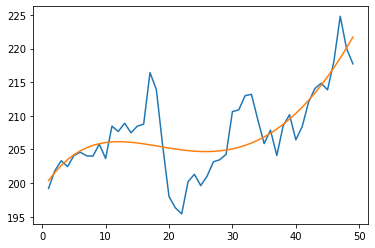

In [19]:
# We now plot our results, like before.
# Compute the hypothesis using the normalized X values, appending a vector of ones to Xnorm for the bias unit.
hx = np.hstack((np.ones((Xnorm.shape[0],1)), Xnorm)).dot(theta)
# Now, we de-normalize the predictions to get our predictions.
hx = (hx*rangey)+meany
# Plot the original data points.
plt.plot(X,y)
# Plot the hypothesis.
plt.plot(X,hx)
# Show the plot.
plt.show()

# That is a simple introduction to regression using gradient descent and machine learning. I hope you had fun. The end!

# Conclusion
We can use both linear regression and polynomial regression to find structures in data. We can use these structures to extrapolate given data to predict future values of data. This is regression.

# Future Explorations
## Increasing Accuracy
In order to make the hypothesis even more exact, you can add more features such as x6, x7, etc. You can also increase the number of iterations of regression to achieve a more precise set of theta values.

## The Overfitting Problem and Regularization
Sometimes, we may make our model so good that it “overfits” the given data. In these cases, we can regularize our data by putting a cost on the theta values. You can try implementing regularization by yourself to get a more robust model. 

## Splitting our Data Set and Evaluating our Model
Many times, we also like to split our dataset into training and testing sets. You should set approximately 90% of your data to the training data and 10% to the testing data. The training data will be used to find the theta values, and the testing data will be used to measure the accuracy of the model’s predictions. If the model is overfitted or underfitted to the data, you will have a high error for the test data. On the other hand, if you have a robust model, both the error on the training data and testing data should be low, as the model is able to successfully generalize its hypotheses to new examples. 